# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


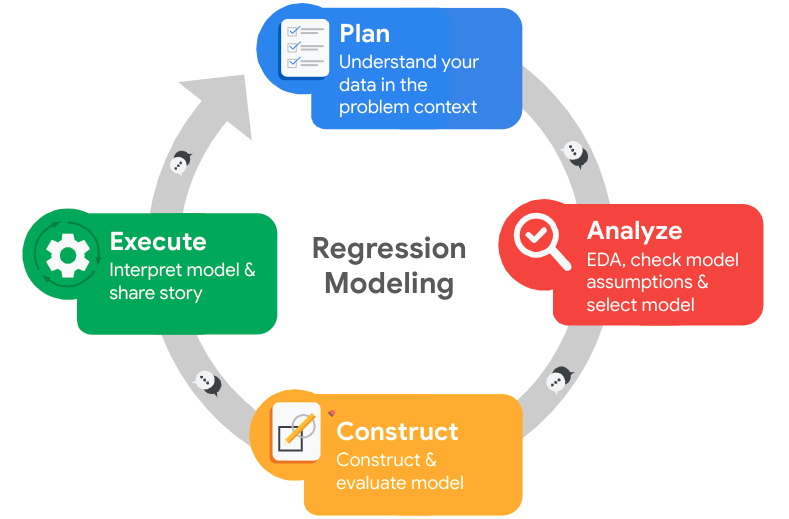

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.
- Who are your stakeholders for this project?

The stackholders for this project are salifort motors HR Departement

- What are you trying to solve or accomplish?

The probleme we are trying to solve or accomplish is to identify the factors leading to employee attrition, so we can improve employee satisfaction levels at the company

- What are your initial observations when you explore the data?

My initial observation is that the binary column 'left' can serve as the target variable for our model to predict employee attrition.

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [2]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.tree import plot_tree


## plot feature importance 
from xgboost import plot_importance 

# Import packages for data modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, mean_absolute_error,r2_score,\
mean_squared_error, roc_auc_score

from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.preprocessing import StandardScaler

# Import packages for machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Import packages to save our models once we fit them.
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a datafram
df0 = pd.read_csv("HR_capstone_dataset.csv")

# Display first few rows of the dataframe
df1 = df0.copy()
df1.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [4]:
# Gather basic information about the data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [5]:
# Gather descriptive statistics about the data
df1.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [6]:
# Display all column names
df1.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
# Rename columns as needed
df1 = df1.rename(columns= {'number_project': 'num_projects',
                         'average_montly_hours': 'avg_monthly_hours',
                         'time_spend_company': 'years_at_company',})

df1.columns = df1.columns.str.lower()

# Display all column names after the update
df1.columns


Index(['satisfaction_level', 'last_evaluation', 'num_projects',
       'avg_monthly_hours', 'years_at_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [8]:
# Check for missing values
df1.isna().sum()

satisfaction_level       0
last_evaluation          0
num_projects             0
avg_monthly_hours        0
years_at_company         0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [9]:
# Check for duplicates
print("numbers of duplicate in the data : ",df1.duplicated().sum())

numbers of duplicate in the data :  3008


In [10]:
# Inspect some rows containing duplicates as needed
df1[df1.duplicated(keep=False)].head()

satisfaction_level  last_evaluation  num_projects  avg_monthly_hours  \
0                0.38             0.53             2                157   
1                0.80             0.86             5                262   
2                0.11             0.88             7                272   
3                0.72             0.87             5                223   
4                0.37             0.52             2                159   

   years_at_company  work_accident  left  promotion_last_5years department  \
0                 3              0     1                      0      sales   
1                 6              0     1                      0      sales   
2                 4              0     1                      0      sales   
3                 5              0     1                      0      sales   
4                 3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [11]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df = df1.drop_duplicates(keep='first')
print("shape of the df with duplicates dropped: ", df.shape)

# Display first few rows of new dataframe as needed
df.head()

shape of the df with duplicates dropped:  (11991, 10)


satisfaction_level  last_evaluation  num_projects  avg_monthly_hours  \
0                0.38             0.53             2                157   
1                0.80             0.86             5                262   
2                0.11             0.88             7                272   
3                0.72             0.87             5                223   
4                0.37             0.52             2                159   

   years_at_company  work_accident  left  promotion_last_5years department  \
0                 3              0     1                      0      sales   
1                 6              0     1                      0      sales   
2                 4              0     1                      0      sales   
3                 5              0     1                      0      sales   
4                 3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

### Change the binary (1,0) column `left` with 1 as left and 0 as stayed

This change was implemented to facilitate exploratory data analysis and visualization and will be deleted later.

In [12]:
## add new column left_n
df["left_n"] = np.where(df['left'] == 1, 'left', 'stayed')

C:\Users\chaib\AppData\Local\Temp\ipykernel_3376\2704927572.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["left_n"] = np.where(df['left'] == 1, 'left', 'stayed')


### Check outliers

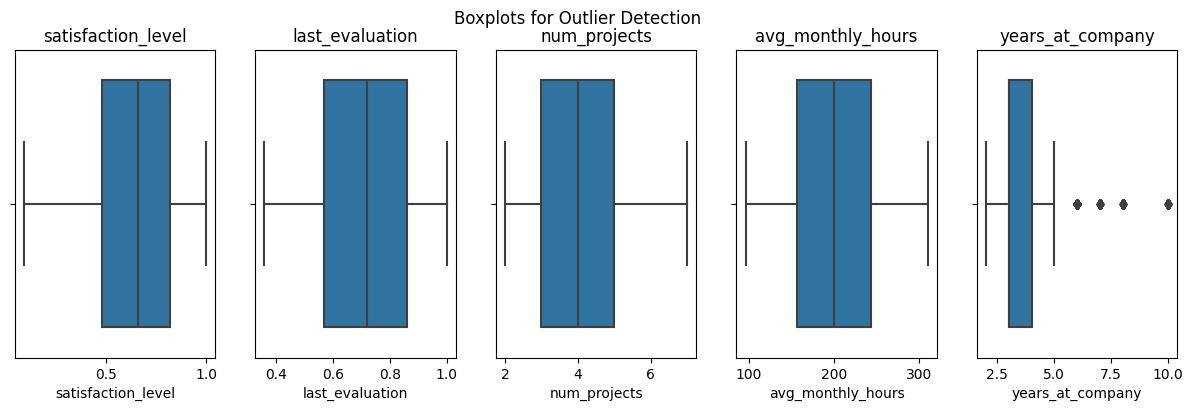

In [13]:
# boxplot to visualize distribution of all the numeric value we have
selected_columns = ['satisfaction_level', 'last_evaluation',
                    'num_projects', 'avg_monthly_hours', 'years_at_company']

# Create subplots for box plots
fig, axes = plt.subplots(1, len(selected_columns), figsize=(15, 4))
fig.suptitle('Boxplots for Outlier Detection')

# Create box plots for each selected column
for i, col in enumerate(selected_columns):
    sns.boxplot(ax=axes[i], x=df[col])
    axes[i].set_title(col)

plt.show()

Check for outliers in the data.

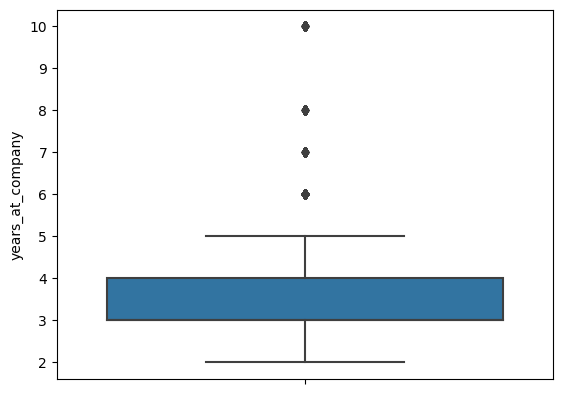

In [14]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
sns.boxplot(y=df['years_at_company'])
plt.show()

In [15]:
# Determine the number of rows containing outliers
percentile25 = df["years_at_company"].quantile(0.25)
percentile75 = df["years_at_company"].quantile(0.75)

iqr = percentile75 - percentile25
lower_limit = percentile25 - 1.5 * iqr
upper_limit = percentile75 + 1.5 * iqr

# Count the number of rows containing outliers
num_outliers = len(df[(df['years_at_company'] > upper_limit) | (df['years_at_company'] < lower_limit)])

print(f"The lower limit: {lower_limit}")
print(f"The upper limit: {upper_limit}")
print(f"Number of rows containing outliers: {num_outliers}")


The lower limit: 1.5
The upper limit: 5.5
Number of rows containing outliers: 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [16]:
# Get numbers of people who left vs. stayed
# Get percentages of people who left vs. stayed
value_counts = df['left'].value_counts()
percentage_counts = df['left'].value_counts(normalize=True) * 100

result = pd.concat([value_counts, percentage_counts], axis=1)
result


count  proportion
left                   
0     10000    83.39588
1      1991    16.60412

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

#### Check the correclation between columns

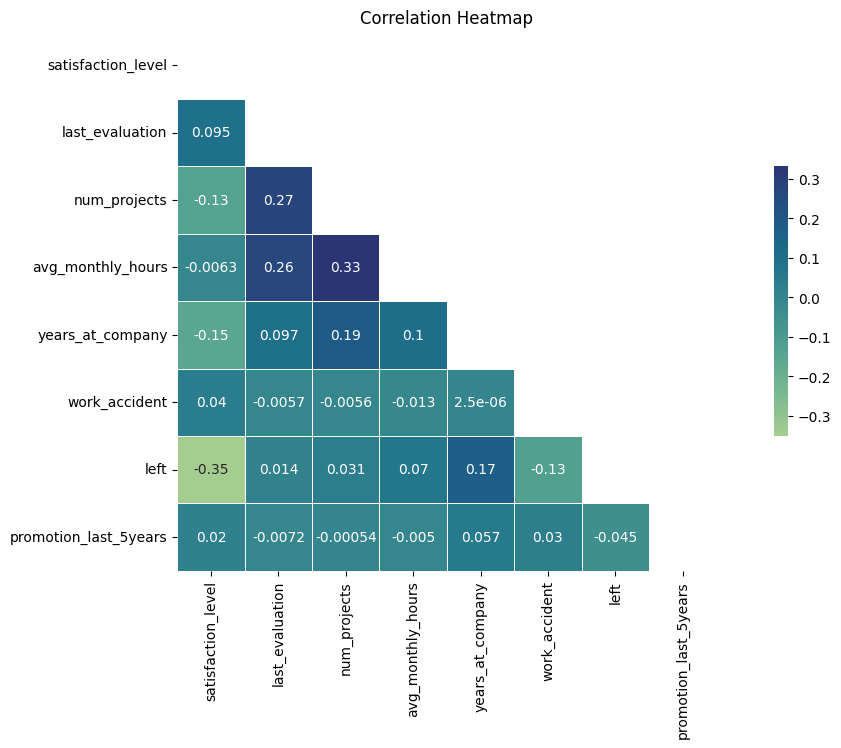

In [17]:
# Create a figure
plt.figure(figsize=(15, 7))

# Compute the correlation matrix for all the numeric columns in the dataframe
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr(method='pearson')

# Create a mask to hide the upper triangle of the heatmap
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create a heatmap with annotations, using the 'crest' colormap
sns.heatmap(correlation_matrix, annot=True, cmap='crest', mask=mask, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Heatmap')
# Display the plot
plt.show()


- Based on the correlation matrix chart, there are some positive correlations between the variables, although they may be small and weak. Additionally, there are some negative correlations as well

#### Check the median of the employee for our value

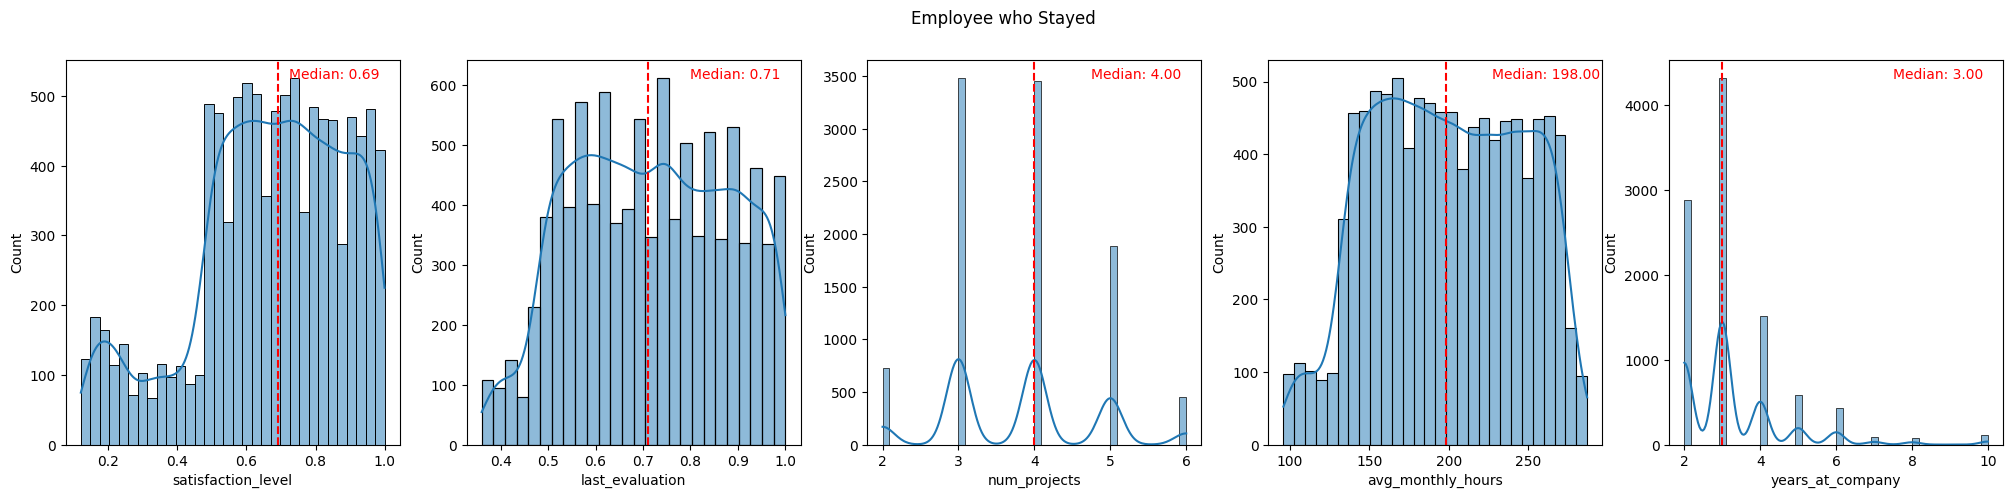

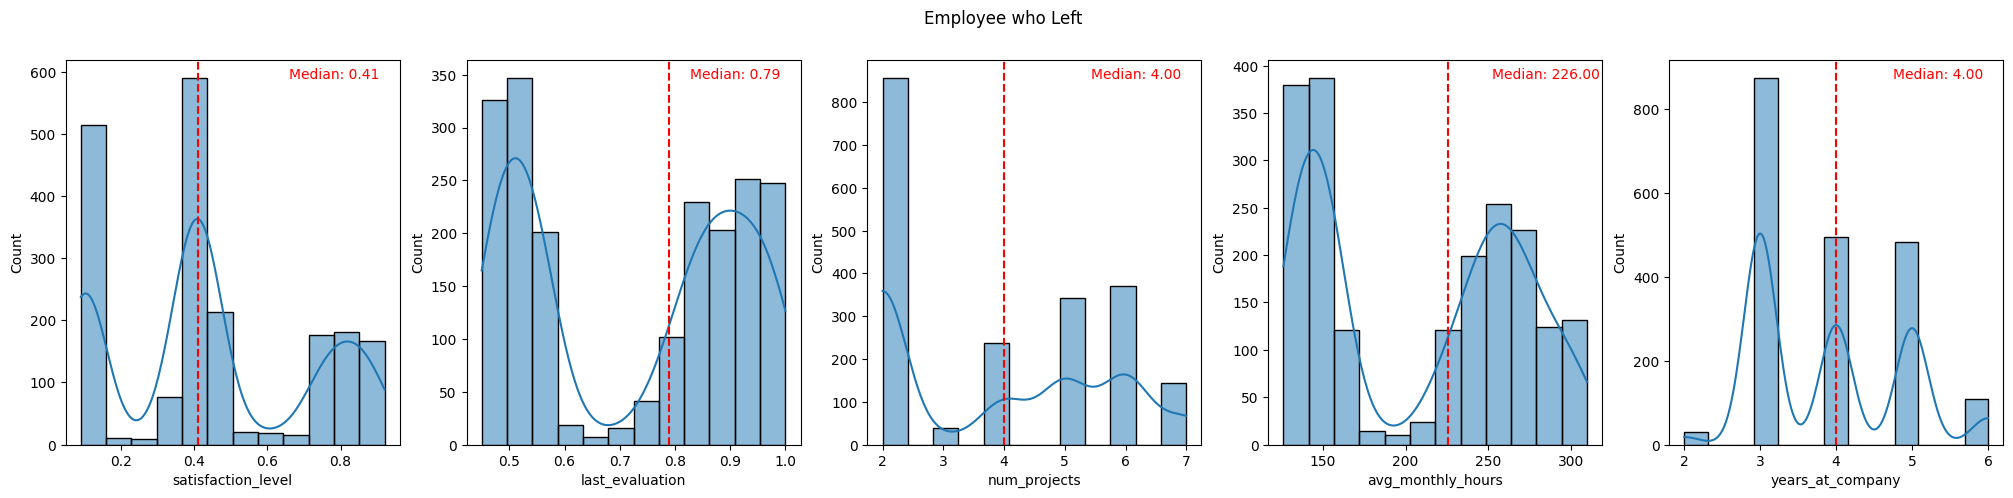

In [18]:
def plot_histograms(df, category):
    # Filter the dataframe based on the category
    df_category = df[df['left_n'] == category]
    
    # Create a figure with 5 subplots, each with a size of 25x5 inches
    fig, axes = plt.subplots(1, 5, figsize=(25, 5))
    
    # Add a title to the figure
    fig.suptitle(f'Employee who {category.capitalize()}')

# Create a histogram for each selected column
    for i, column in enumerate(['satisfaction_level', 'last_evaluation', 'num_projects', 'avg_monthly_hours', 'years_at_company']):
        sns.histplot(ax=axes[i], x=df_category[column], kde=True)
        median = df_category[column].median()
        axes[i].axvline(median, color='red', linestyle='dashed')
        axes[i].text(0.67, 0.95, f'Median: {median:.2f}', transform=axes[i].transAxes, color='red')

# Display the plot
    plt.show()
    
# Create histograms for employees who stayed
plot_histograms(df, 'stayed')

# Create histograms for employees who left
plot_histograms(df, 'left')

##### Get the `median` the `mean` and all value `above and below the median` for the employees who left and stayed

In [19]:
# Define a function to calculate percentages below and above median
def calculate_percentages(df, column_name):
    # Compute the median and mean of the selected column
    median_value = df[column_name].median()
    mean_value = df[column_name].mean()

    # Compute the percentage of values below and above the median
    below_median = (df[df[column_name] < median_value].shape[0] / df.shape[0]) * 100
    above_median = (df[df[column_name] >= median_value].shape[0] / df.shape[0]) * 100

    # Return the computed values
    return below_median, above_median, median_value, mean_value

# Define the categories and columns to calculate percentages for
categories = ['stayed', 'left']
columns_to_calculate = ['satisfaction_level', 'last_evaluation', 'num_projects', 'avg_monthly_hours', 'years_at_company']

# Loop over each category and column to compute percentages
for category in categories:
    df_category = df[df['left_n'] == category]
    print(f'Category: {category.capitalize()}')
    for column in columns_to_calculate:
        below, above, median, mean = calculate_percentages(df_category, column)
        print(f"The median of {column}: {median:.2f}")
        print(f"The mean of {column}: {mean:.2f}")
        print(f"Percentage below the median in {column}: {below:.2f}%")
        print(f"Percentage above or equal to the median in {column}: {above:.2f}%")
        print()


Category: Stayed
The median of satisfaction_level: 0.69
The mean of satisfaction_level: 0.67
Percentage below the median in satisfaction_level: 49.41%
Percentage above or equal to the median in satisfaction_level: 50.59%

The median of last_evaluation: 0.71
The mean of last_evaluation: 0.72
Percentage below the median in last_evaluation: 48.37%
Percentage above or equal to the median in last_evaluation: 51.63%

The median of num_projects: 4.00
The mean of num_projects: 3.79
Percentage below the median in num_projects: 42.07%
Percentage above or equal to the median in num_projects: 57.93%

The median of avg_monthly_hours: 198.00
The mean of avg_monthly_hours: 198.94
Percentage below the median in avg_monthly_hours: 49.44%
Percentage above or equal to the median in avg_monthly_hours: 50.56%

The median of years_at_company: 3.00
The mean of years_at_company: 3.26
Percentage below the median in years_at_company: 28.79%
Percentage above or equal to the median in years_at_company: 71.21%

Ca

- From the chart and the data, we can observe that the median satisfaction level among all our employees is 0.66. The distribution appears to be slightly skewed to the left, indicating that the majority of employees have a relatively high level of satisfaction (When we split the data on whether they left or stayed, we find that employees who stayed have a higher satisfaction level, with a median of 0.69. On the other hand, employees who left the company have a lower median satisfaction level of 0.41.)

- An important thing to note is that the median monthly hours in the company are 200, while in USA the average monthly hours are generally 167 hours. 

- It appears that the tenure (year_at_company) of employees who have left the company is between 2 and 6 years. We do not have any records of employees leaving the company between 7 and 10 years.”

- With this information, we will further explore the data to determine if the job satisfaction level is correlated with their tenure at the company. Additionally, we will investigate if other variables may have an impact on job satisfaction. Notably, the average monthly hours worked appear to exceed the normal average working hours by 24 hours, suggesting a potential factor to consider.

#### Check the relationship between `satisfaction level` and `average monthly hours` using color categories to distinguish between those who left / stayed

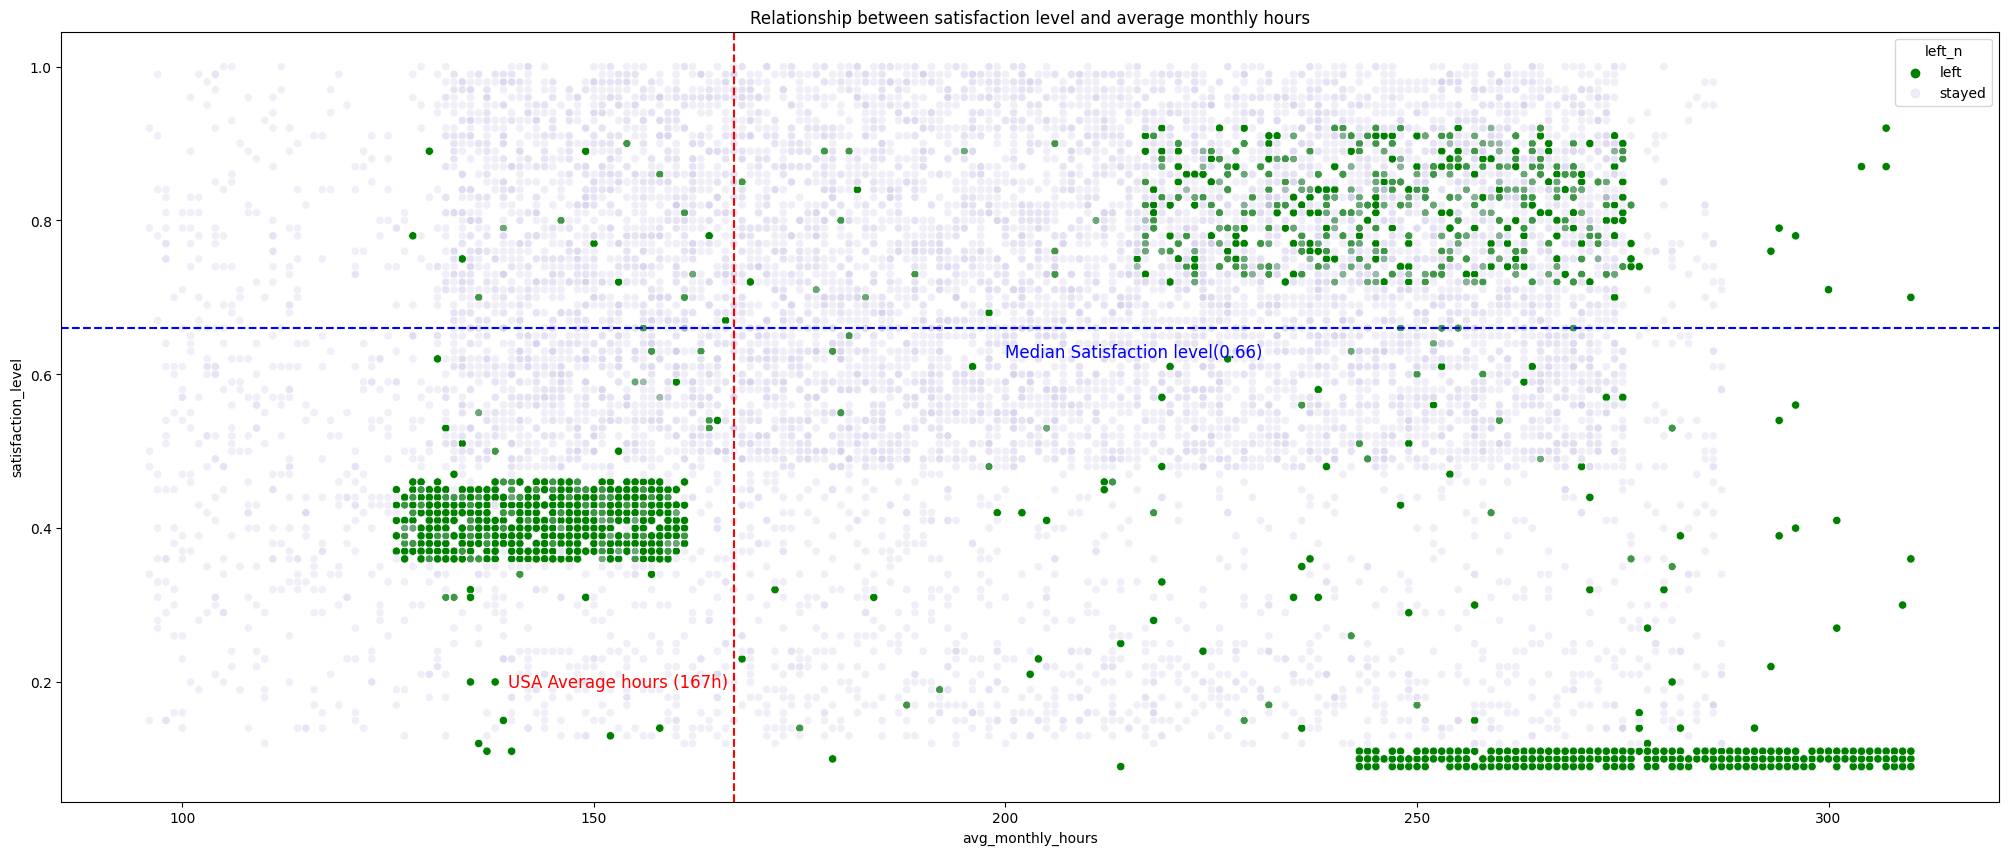

In [20]:
# Define a custom color palette with a transparent blue (RGBA format)
custom_palette = {'stayed': (208/255, 204/255, 235/255, 0.3), 'left': 'green'}

# Create the scatter plot with the custom color palette
plt.figure(figsize=(25, 10))
sns.scatterplot(data=df, x="avg_monthly_hours", y="satisfaction_level", hue="left_n",  palette=custom_palette)

# Add vertical and horizontal lines to the plot
plt.axvline(x=167, color='red', ls='--')  
plt.axhline(y=0.66, color='blue', ls='--')

# Add text labels to the plot
plt.text(167, 0.2, 'USA Average hours (167h) ', color='red', fontsize=12, va='center', ha='right')
plt.text(200, 0.64, 'Median Satisfaction level(0.66)', color='blue', fontsize=12, va='top', ha='left')

# Add a title to the plot
plt.title('Relationship between satisfaction level and average monthly hours')

# Display the plot
plt.show()


This chart illustrates the relationship between the number of hours worked per month and the satisfaction level of employees. It uses color categories to distinguish between those who left the company and those who stayed. The color categories indicates three distinct groups:

- The first group comprises individuals who worked fewer hours than the average (167 hours) per month. Their satisfaction level is relatively low, hovering around 0.4. It's challenging to pinpoint the exact reasons for their departure from the company.

- The second  group consists of employees who worked between 215 to 280 hours per month. Their satisfaction levels vary between 0.7 to 0.9, indicating a higher degree of satisfaction. 

- The third group includes individuals who worked excessively, ranging from 245 to 315 hours monthly. Consequently, their satisfaction levels are extremely low, dipping below 0.1, almost akin to dissatisfaction. This correlation suggests a clear relationship between long working hours and low satisfaction.

`note: ` We can see that there are no employees who stayed after working more than 290 hours. we will confirm if it is correct

##### Check the employees who work more than `~ 290 hours`.

In [21]:
# Define a custom color palettecolor_palette = {'stayed': 'blue', 'left': 'red'}
color_palette = {'stayed': 'orange', 'left': 'cadetblue'}

# Create a histogram with custom colors
fig = px.histogram(df, x="avg_monthly_hours", color="left_n", color_discrete_map=color_palette)

# Add a vertical line at 166 hours
fig.add_vline(x=167, line_dash="dash", line_color="green", annotation_text="USA Average hours (167h)", annotation_position="top left")
fig.add_vline(x=200, line_dash="solid", line_color="red", annotation_text="Company Average hours (~200h)", annotation_position="top right")
fig.add_vline(x=290, line_dash="solid", line_color="darkred", annotation_text="All left (290h)", annotation_position="top right")
# Show the plot
fig.show()

In [22]:
# calculate the mean and median of the average monthly hours
df.groupby(['left_n'])['avg_monthly_hours'].agg([np.mean,np.median,np.max])

mean  median  amax
left_n                         
left    208.16223   226.0   310
stayed  198.94270   198.0   287

In [23]:
# Calculate the percentage of employees working more hours than the average monthly hours (167) 
print("percentage of employees working more hours than the average monthly hours (167): ",round((len(df[df['avg_monthly_hours'] > 167]) / len(df)) * 100, 2),'%')

percentage of employees working more hours than the average monthly hours (167):  68.36 %


- From the chart, it appears that all employees who work more than ~290 hours monthly have left the company.

- It appears from the median that employees who left the company worked 28 hours more than the employees who remained with the company.

- Approximately 68% of our workforce is exceeding the standard working hours.

`Note :` in the USA The average monthly hours worked by employees is approximately 167 hours per month.

#### Check the relationship between `satisfaction level` and `last eveluation`

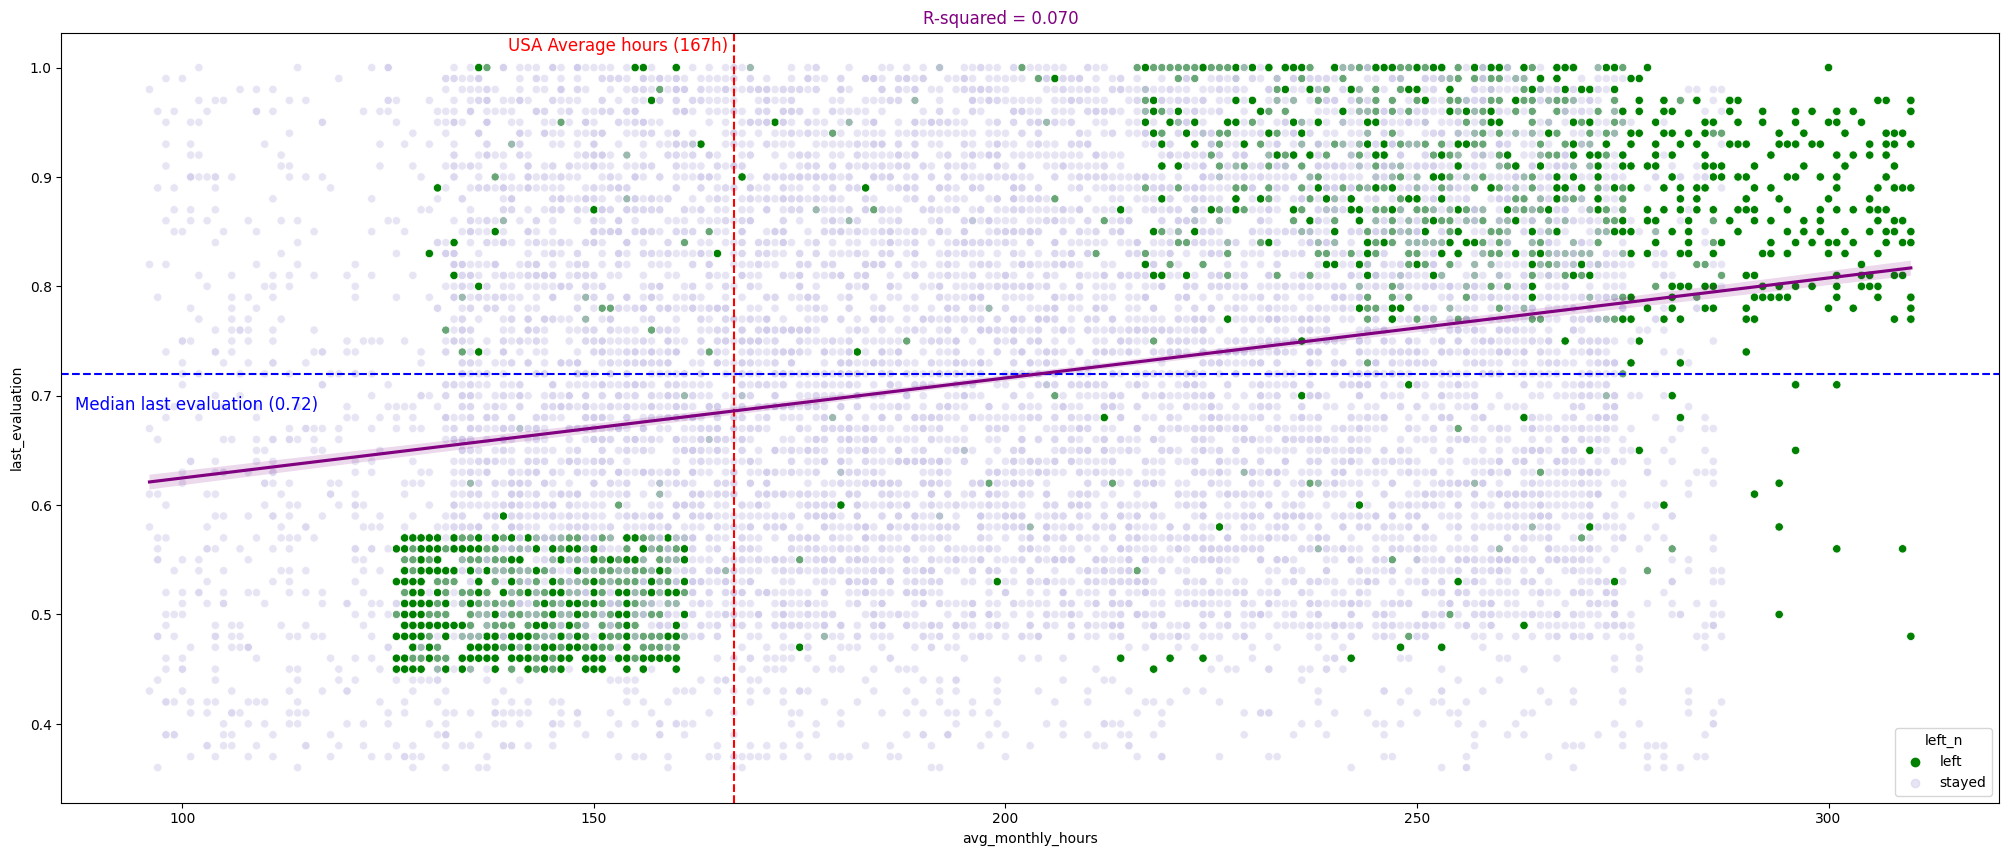

In [24]:
from scipy import stats

# Define a custom color palette with a transparent blue (RGBA format)
custom_palette = {'stayed': (208/255, 204/255, 235/255, 0.5), 'left': 'green'}

# Create the catplot with the custom color palette
plt.figure(figsize=(25, 10))
sns.scatterplot(data=df, x="avg_monthly_hours", y="last_evaluation", hue="left_n", palette=custom_palette)
plt.axvline(x=167, color='red', ls='--') 
plt.axhline(y=0.72, color='blue', ls='--')
plt.text(167, 1.02, 'USA Average hours (167h) ', color='red', fontsize=12, va='center', ha='right')
plt.text(87, 0.7, 'Median last evaluation (0.72) ', color='blue', fontsize=12, va='top', ha='left')

# Add a regression line for correlation
sns.regplot(data=df, x="avg_monthly_hours", y="last_evaluation", color='purple', scatter=False)

# Calculate and display R-squared
slope, intercept, r_value, p_value, std_err = stats.linregress(df["avg_monthly_hours"], df["last_evaluation"])
r_squared = r_value ** 2
plt.text(190, 1.04, f'R-squared = {r_squared:.3f}', color='purple', fontsize=12)
plt.show()

- It appears that there is a correlation between average monthly hours and the evaluation score, although the correlation seems to be weak. It's important to note that working long hours doesn't necessarily guarantee a high evaluation score.

- We have two distinct groups within our workforce. The first group consists of employees who work slightly below the average monthly hours of 167 and have lower evaluation scores. The second group is comprised of overworked employees who, despite their heavy workload, have demonstrated exceptional performance.

#### Check the Relationship between `average monthly hours` and `promotion last 5 years`

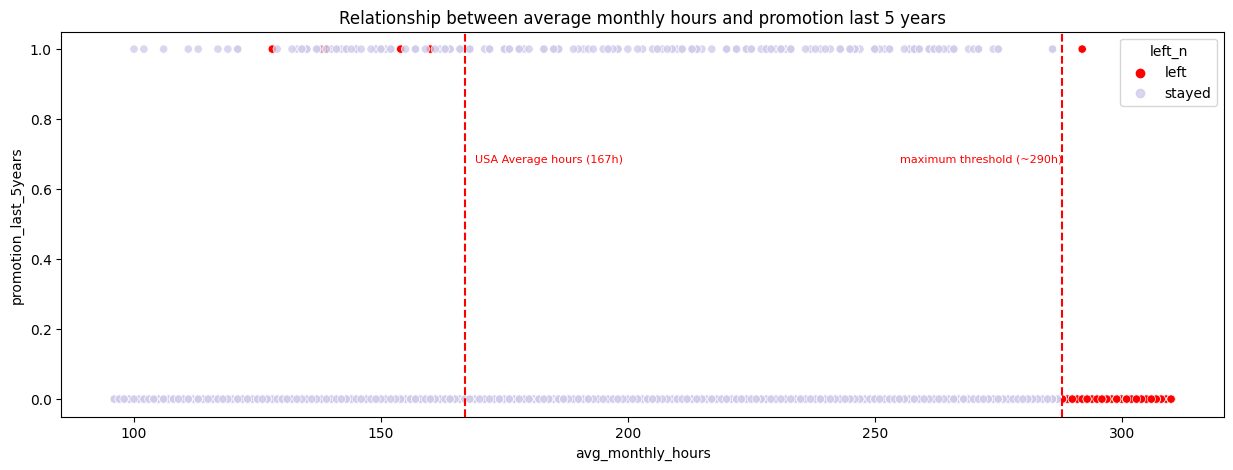

In [25]:
# Create a scatter plot with custom colors
plt.figure(figsize=(15, 5))
custom_palette = {'stayed': (208/255, 204/255, 235/255, 0.8), 'left': 'red'}
sns.scatterplot(data=df, x="avg_monthly_hours", y="promotion_last_5years", hue="left_n", palette=custom_palette)

# Add vertical lines to the plot
plt.axvline(x=167, color='red', ls='--') 
plt.axvline(x=288, color='red', ls='--') 

# Add text labels to the plot
plt.text(169, 0.7, 'USA Average hours (167h) ', color='red', fontsize=8, va='top', ha='left')
plt.text(288, 0.7, 'maximum threshold (~290h)', color='red', fontsize=8, va='top', ha='right')

# Add a title to the plot
plt.title('Relationship between average monthly hours and promotion last 5 years')

# Display the plot
plt.show()


`Note: ` ~290 hours is the established maximum threshold of working hours per month. Beyond this point, we have observed a trend where all employees, irrespective of their satisfaction level, recent promotions, or high salary, tend to leave the company.(~290 hours per month is equivalent to over ~13 hours every day and ~72 hours every week.)
-  it seems that there is no significant correlation between working long hours and receiving a promotion.

Check how many employees have been promoted in the last five years.

Which salary category and department had the highest number of employee promotions during this period

Calculate the promotion rate

##### The number of employees who have been promoted in the last five years and the `promotion rate`.

In [26]:
## promotion rate
print('Total employees: ',df['avg_monthly_hours'].count())
print('Total promotion: ',df[df['promotion_last_5years'] == 1].count()[0])
print("The promotion rate is :" ,((df[df['promotion_last_5years'] == 1].count()[0] / df['avg_monthly_hours'].count()) * 100).round(2),"%")

Total employees:  11991
Total promotion:  203
The promotion rate is : 1.69 %


- In the past 5 years, we have only promoted 203 employees.

- The average promotion rate for all industries is 6%, according to the Society for Human Resource Management (SHRM). It's important to note that promotion rates can vary greatly between industries. Therefore, our promotion rate (1.69%) seems relatively low .

##### The distribution of promotions across the salary categories and departments.

The DataFrame is a horizontal computation (Across rows).

In [27]:
# Calculate the percentage distribution of salary 
result = df.pivot_table(index='promotion_last_5years', columns='salary', aggfunc='size', fill_value=0)
result = (result.div(result.sum(axis=1), axis=0) * 100).round(2)
result = result.reset_index()
result = result.rename(columns={"promotion_last_5years": "promotion"})

# Calculate the count of salary 
result2 = df.groupby('promotion_last_5years')['salary'].count().reset_index()
result2.columns = ['promotion', 'employees']

# Merge the two DataFrames
merged_df = pd.merge(result, result2, on='promotion', how='left')
merged_df.loc[:1, ['low', 'medium', 'high']] = merged_df.loc[:1, ['low', 'medium', 'high']].applymap(lambda x: f'{x:.2f}%')
# Print the merged DataFrame
merged_df2 = merged_df[['promotion','employees', 'low', 'medium', 'high']]
merged_df2

promotion  employees     low  medium    high
0          0      11788  48.37%  43.60%   8.03%
1          1        203  18.72%  59.61%  21.67%

`Note`: 0 is for employees who didn't get a promotion, and 1 is for employees who received a promotion. 

- From all the promoted employees, it appears that those who have received the most promotions are employees with a medium salary, accounting for approximately 60% of the total promotions.(However, this figure may be slightly inflated due to the fact that some employees with a low salary may have received a raise to a medium salary, and are therefore counted as having a medium salary. Additionally, there may be more employees with a medium salary than with a high salary, which could also contribute to this trend.)

- Will check the percentage of employees who received a promotion, but not by promotion, but by salary category.

The DataFrame is a vertical computation (Across columns).

In [28]:
# Calculate the percentage distribution of salary
promotion_distribution = df.pivot_table(index='promotion_last_5years', columns='salary', aggfunc='size', fill_value=0)
promotion_distribution = (promotion_distribution.div(promotion_distribution.sum(axis=0), axis=1) * 100).round(2)
promotion_distribution = promotion_distribution.reset_index()
promotion_distribution = promotion_distribution.rename(columns={"promotion_last_5years": "promotion"})

# Calculate the count of salary
promotion_count = df.groupby('promotion_last_5years')['salary'].count().reset_index()
promotion_count.columns = ['promotion', 'employees']

# Merge the two DataFrames
merged_df = pd.merge(promotion_distribution, promotion_count, on='promotion', how='left')

# Add a new row for the new salary category
new_row = pd.DataFrame({'employees':[11991],'low': [5740], 'medium': [5261], 'high': [990]})
merged_df4 = pd.concat([merged_df[['promotion', 'employees', 'low', 'medium', 'high']], new_row])

# Add % to the output of the first two rows
merged_df4.loc[:1, ['low', 'medium', 'high']] = merged_df4.loc[:1, ['low', 'medium', 'high']].applymap(lambda x: f'{x:.2f}%')

merged_df4.reset_index(drop=True)


promotion  employees     low  medium    high
0        0.0      11788  99.34%  97.70%  95.56%
1        1.0        203   0.66%   2.30%   4.44%
2        NaN      11991  5740.0  5261.0   990.0

`Note`: 0 is for employees who didn't get a promotion, and 1 is for employees who received a promotion. The last row is the total of the 4 columns (vertical computation.), and it is not a percentage.

- It appears that only 2.3% of employees with a medium salary have received a promotion.

- The promotion rate is higher for employees with a high salary.

The DataFrame is a horizontal computation (Across rows).

In [29]:

# Calculate the percentage distribution of department by tenure
result = df.pivot_table(index='promotion_last_5years', columns='department', aggfunc='size', fill_value=0)
result = (result.div(result.sum(axis=1), axis=0) * 100).round(2)
result = result.reset_index()
result = result.rename(columns={"promotion_last_5years": "promotion"})

# Calculate the count of department by tenure
result2 = df.groupby('promotion_last_5years')['department'].count().reset_index()
result2.columns = ['promotion', 'employees']

# Merge the two DataFrames
merged_df = pd.merge(result, result2, on='promotion', how='left')
merged_df.loc[:1, ['IT', 'RandD', 'accounting', 'hr', 'management', 'marketing',
                   'product_mng', 'sales', 'support', 'technical']] = merged_df.loc[:1,
                                                                                    ['IT', 'RandD', 'accounting', 'hr', 'management', 'marketing',
                   'product_mng', 'sales', 'support', 'technical']].applymap(lambda x: f'{x:.2f}%')
# Print the merged DataFrame
#print("Percentage Distribution of Salary by promotion with employees")

merged_df


promotion     IT   RandD accounting     hr management marketing  \
0          0  8.26%   5.71%      5.18%  5.01%      3.39%     5.48%   
1          1  0.99%  10.34%      4.93%  5.42%     17.73%    13.30%   

  product_mng   sales support technical  employees  
0       5.82%  26.99%  15.31%    18.85%      11788  
1       0.00%  28.57%   7.88%    10.84%        203

`Note`: 0 is for employees who didn't get a promotion, and 1 is for employees who received a promotion. The DataFrame is a horizontal computation(Across rows).

- Over the past five years, the sales department has had the highest promotion rate at 28.57%, while the product management department has had a promotion rate of 0%.

#### Check the relationship between `Tenure (years_at_company)` , `satisfaction level`  and `average monthly hours`

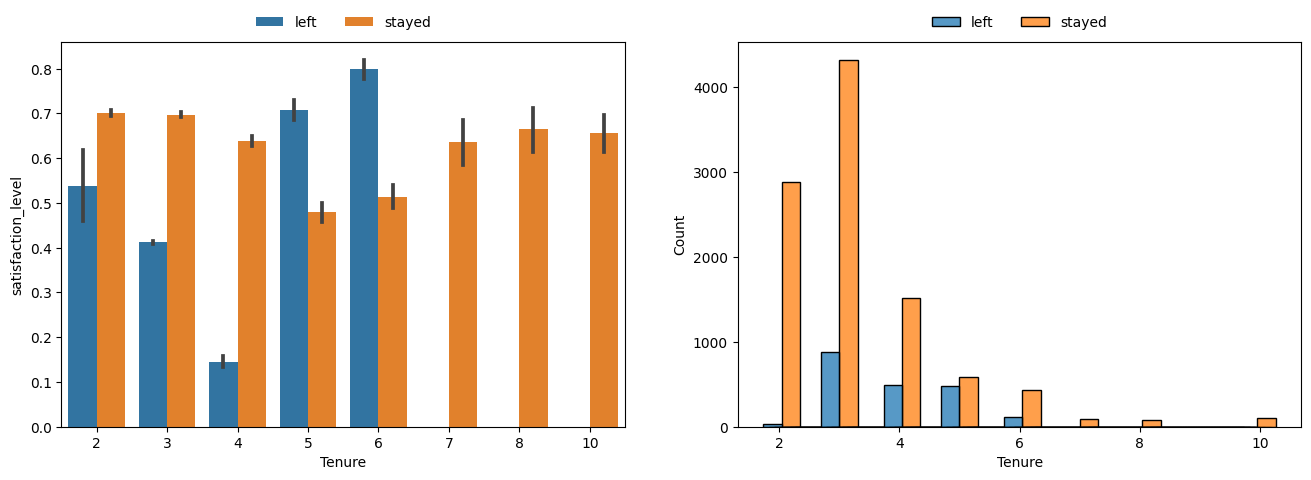

In [30]:
# Create a figure with two subplots in the same row
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# First chart (barplot)
sns.barplot(data=df, x="years_at_company", y="satisfaction_level", hue="left_n", ax=ax1)
sns.move_legend(ax1, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)
ax1.set_xlabel('Tenure')

# Second chart (histplot)
sns.histplot(data=df, x="years_at_company", hue="left_n", multiple='dodge', shrink=7, ax=ax2)
sns.move_legend(ax2, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)
ax2.set_xlabel('Tenure')

# Show the plots
plt.show()

- It appears that we do not have any employees who have left the company with a tenure exceeding 6 years. Their satisfaction level is above the median (0.66), which aligns with those of newer employees who stayed. There are relatively few longer-tenured employees.

- The data suggests that the highest satisfaction levels are observed among employees with tenures between 5 and 6 years. Unfortunately, these are the employees who have left the company.

- The lowest satisfaction levels are seen at the 4-year mark.

#### Check the `Tenure` by `Salary`

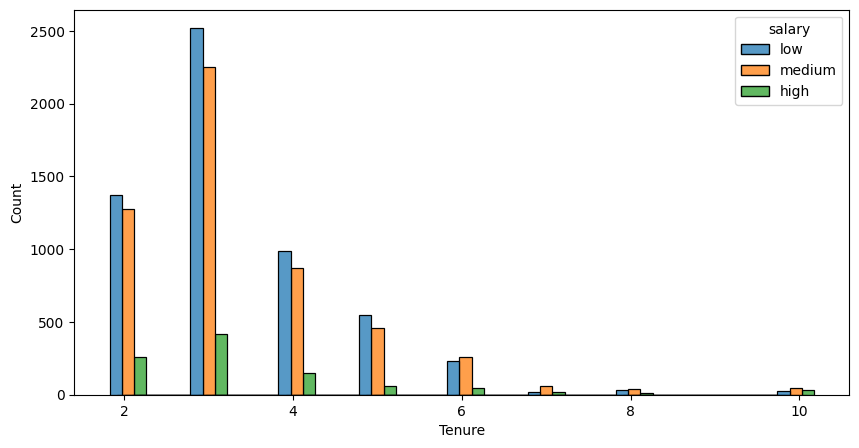

In [31]:
# Create a histogram with custom colors
plt.figure(figsize=(10, 5))

# Create a histogram 
sns.histplot(data=df, x="years_at_company", hue="salary", multiple="dodge", shrink=5)

# Add a label to the x-axis
plt.xlabel('Tenure')

# Display the plot
plt.show()


##### Check the Percentage Distribution of `Salary` by `Tenure`

In [32]:

# Calculate the percentage distribution of salary by tenure
result = df.pivot_table(index='years_at_company', columns='salary', aggfunc='size', fill_value=0)
result = (result.div(result.sum(axis=1), axis=0) * 100).round(2)
result = result.reset_index()
result = result.rename(columns={"years_at_company": "tenure"})

# Calculate the count of salary by tenure
result2 = df.groupby('years_at_company')['salary'].count().reset_index()
result2.columns = ['tenure', 'employees']

# Merge the two DataFrames
merged_df = pd.merge(result, result2, on='tenure', how='left')
merged_df.loc[:7, ['low', 'medium', 'high']] = merged_df.loc[:7, ['low', 'medium', 'high']].applymap(lambda x: f'{x:.2f}%')
# Print the merged DataFrame
print("Percentage Distribution of employees by salary and tenure")
merged_df = merged_df[['tenure', 'low', 'medium', 'high', 'employees']]
merged_df

Percentage Distribution of employees by salary and tenure


tenure     low  medium    high  employees
0       2  47.22%  43.92%   8.87%       2910
1       3  48.54%  43.39%   8.07%       5190
2       4  49.18%  43.34%   7.48%       2005
3       5  51.79%  42.84%   5.37%       1062
4       6  43.36%  48.15%   8.49%        542
5       7  19.15%  60.64%  20.21%         94
6       8  37.04%  51.85%  11.11%         81
7      10  26.17%  43.93%  29.91%        107

- From what we can see, long tenure doesn't necessarily mean high salary, so it is not disproportionately comprised of higher-paid employees.

##### Check the relationship between `Tenure` and `average monthly hours`

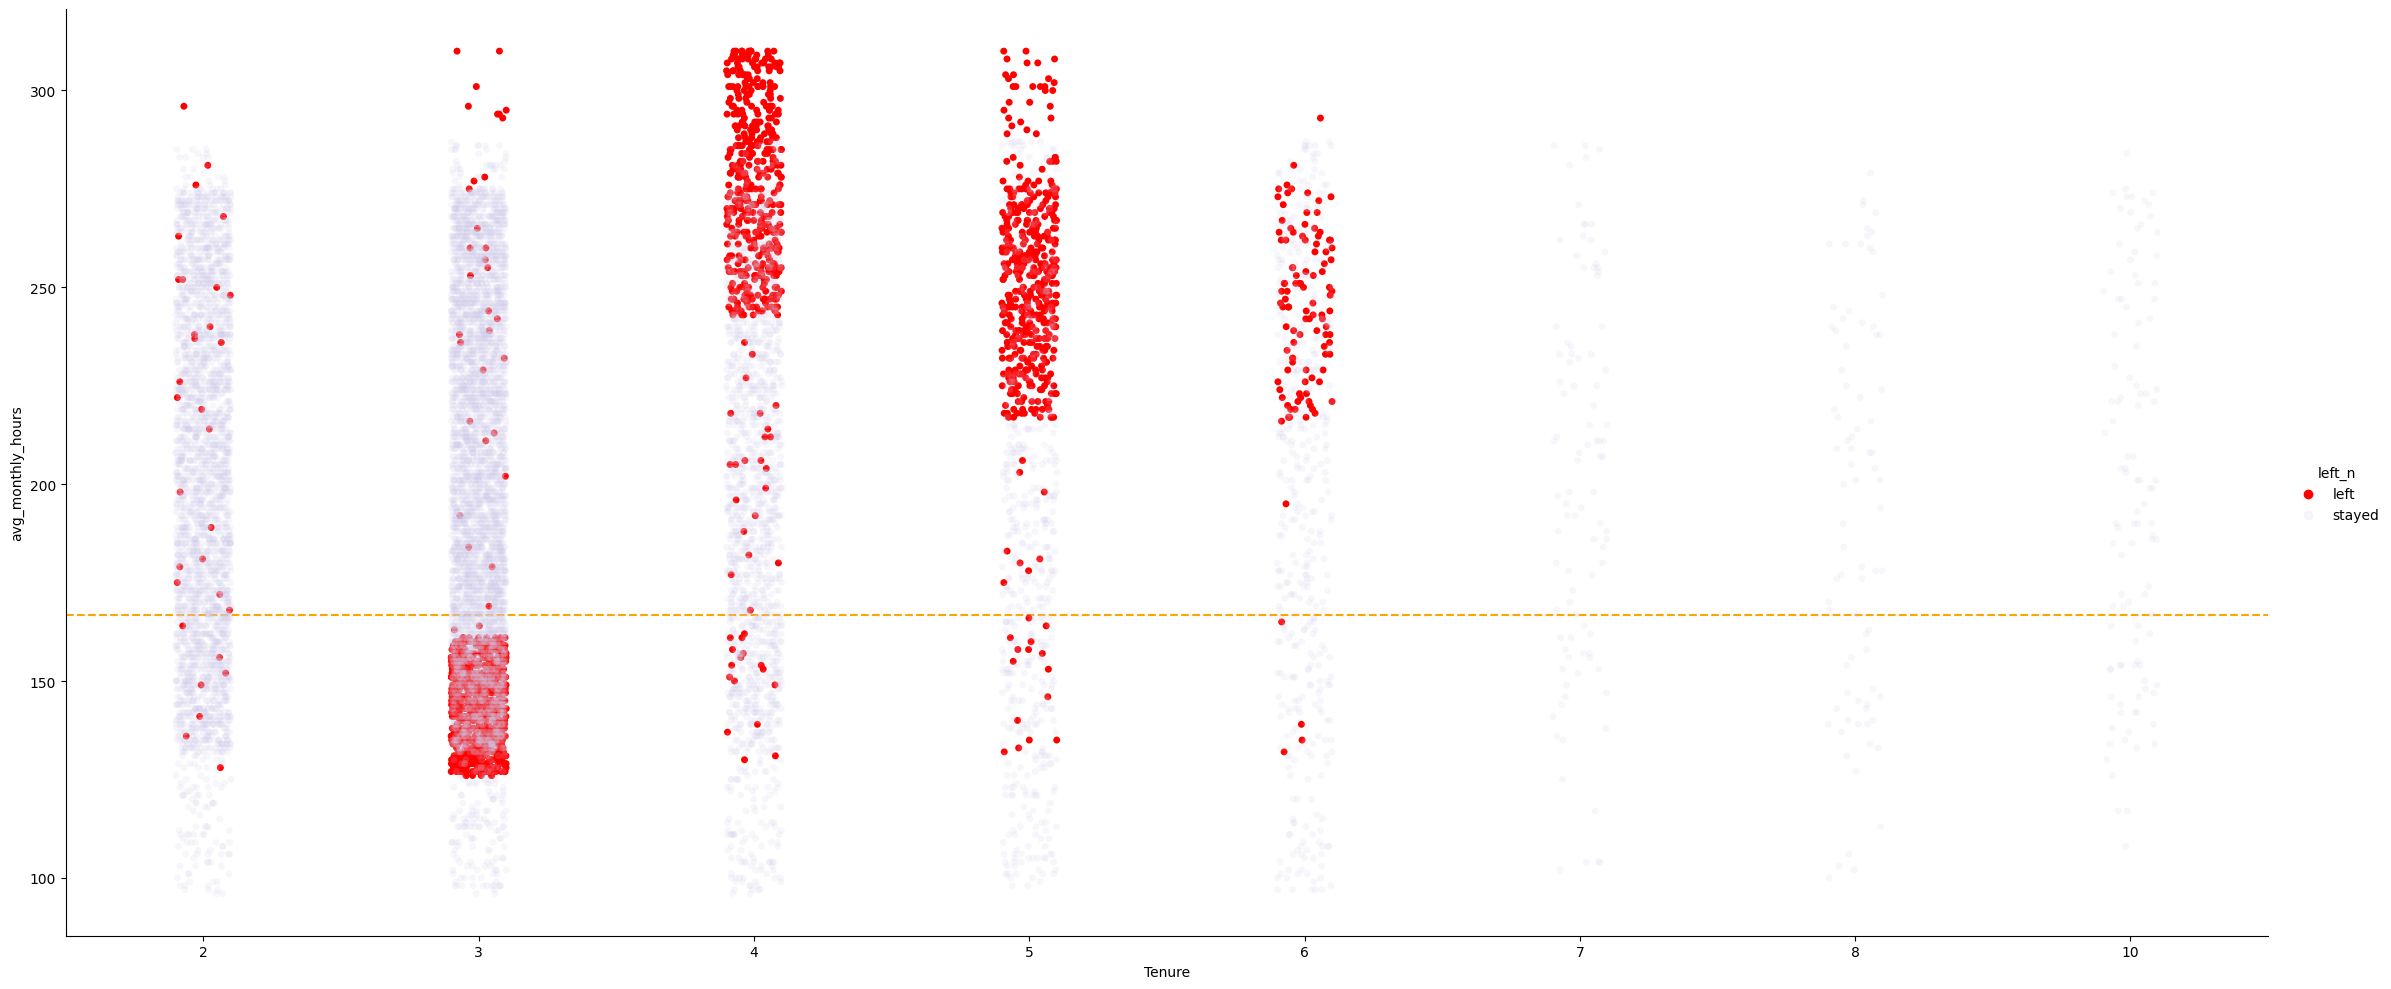

In [33]:
# Define a custom color palette with a transparent blue (RGBA format)
custom_palette = {'stayed': (208/255, 204/255, 235/255, 0.16), 'left': 'red'}

# Create a categorical plot with the custom color palette
sns.catplot(df, x="years_at_company", y="avg_monthly_hours", hue="left_n", height=10, aspect=2.3,  palette=custom_palette)

# Add a horizontal line to the plot
plt.axhline(y=166.67, color='orange', ls='--')

# Add a label to the x-axis
plt.xlabel('Tenure')

# Display the plot
plt.show()


- An important thing to note is that the groups of employees who left the company with 3-year tenure and those with 4, 5, and 6-year tenures are not the same. 

- the cloud of The group with 3 years of tenure did not exceed the average monthly hours, indicating that overworking wasn't the primary issue for this group. However, when employees reached the 4-year mark, the cloud for the monthly hours started at 230, and as they worked more hours, the likelihood of them leaving the company increased, and from 4 to 5 the cloud start decreased. We may infer that overworking could be a contributing factor for the second group.".

#### Check the relationship between `number of project`, `satisfaction level`, `average monthly hours` and the employees who left and stayed

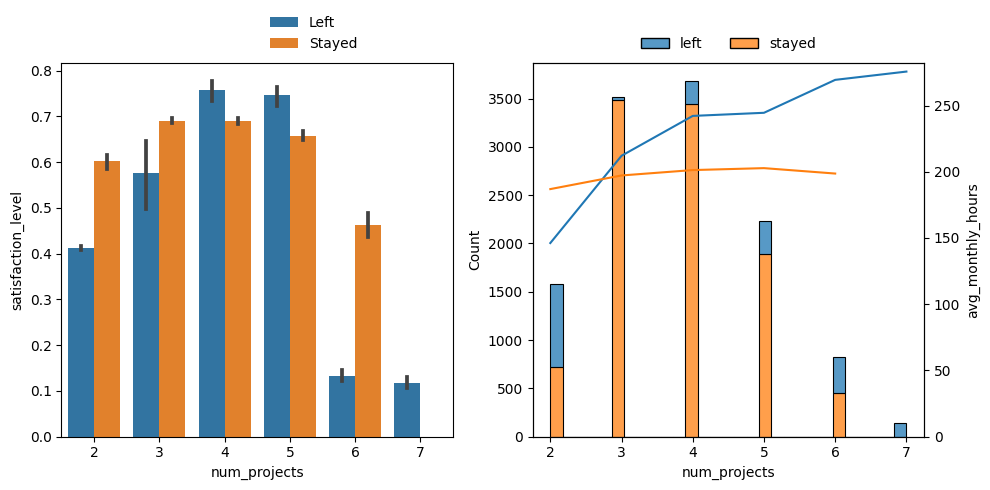

In [34]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# First subplot - Barplot
ax1 = sns.barplot(data=df, x="num_projects", y="satisfaction_level", hue="left_n", ax=axes[0])
handles, _ = ax1.get_legend_handles_labels()
ax1.legend(handles, ["Left", "Stayed"], title=None, loc=3, bbox_to_anchor=(0.5, 1), frameon=False)

# Second subplot - Histogram and Line Chart
ax2 = sns.histplot(df, x='num_projects', hue='left_n', multiple="stack", ax=axes[1])
sns.move_legend(ax2, "lower center", bbox_to_anchor=(0.5, 1), ncol=3, title=None, frameon=False)

# Create a second axis for the line chart
ax3 = ax2.twinx()

# Add the line chart to the second axis and set errorbar=None to remove error bars
sns.lineplot(data=df, x='num_projects', y='avg_monthly_hours',hue='left_n', color='red', ax=ax3, errorbar=None,legend=None)

# Set the y-axis limits for ax3 to start from 0
ax3.set_ylim(0, ax3.get_ylim()[1])  # Keeps the upper limit the same as the automatically computed value

# Adjust spacing between subplots
plt.tight_layout() 

plt.show()


In [35]:
df.groupby(['left_n'])['num_projects'].value_counts().sort_index()

left_n  num_projects
left    2                857
        3                 38
        4                237
        5                343
        6                371
        7                145
stayed  2                725
        3               3482
        4               3448
        5               1890
        6                455
Name: count, dtype: int64

- It appears from the results that all employees with more than 6 projects have left the company.
- the optimal number of projects for employee to work on seems to be 3 to 4.
- There is a positive correlation between the number of projects an employee works on and their average monthly hours. As the number of projects increases, so does the average monthly hours worked by the employee. 

#### Check if there is a relationship between Departments and Employee Departure

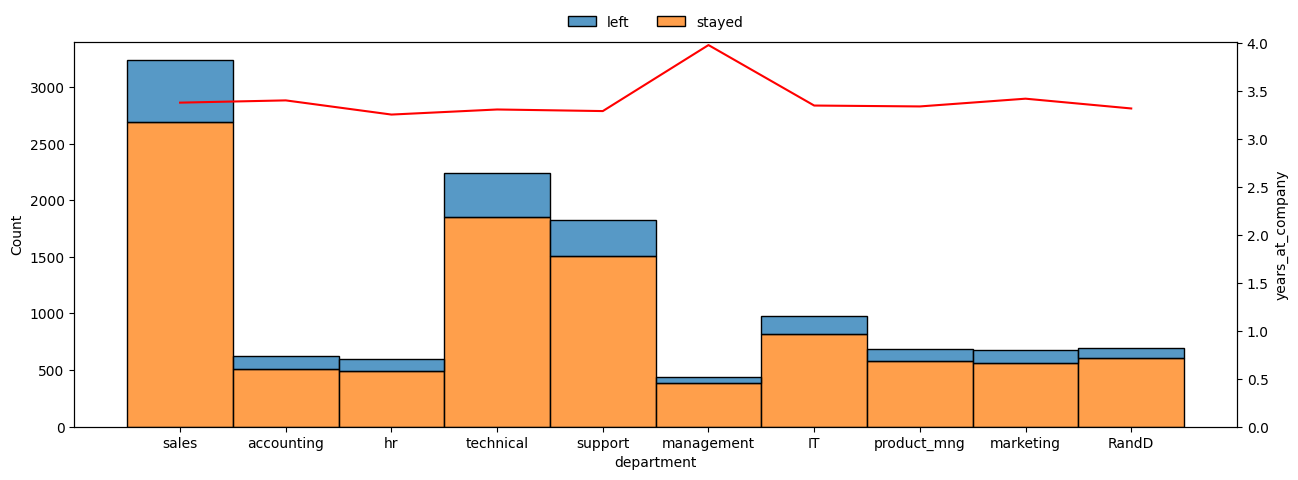

In [36]:
plt.figure(figsize=(15, 5))

# Create the histogram
ax1 = sns.histplot(df, x='department', hue='left_n', multiple="stack")
sns.move_legend(ax1, "lower center",bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,)
# Create a second axis for the line chart
ax2 = ax1.twinx()

# Add the line chart to the second axis and set ci=None to remove error bars
sns.lineplot(data=df, x='department', y='years_at_company', color='red', ax=ax2, errorbar=None)

# Set the y-axis limits for ax2 to start from 0
ax2.set_ylim(0, ax2.get_ylim()[1])  # Keeps the upper limit the same as the automatically computed value

plt.show()

- Based on the chart, the difference in the proportion of employees who left and those who stayed across different departments is low and not statistically significant.

### Insights

Based on the data presented and the charts, it appears that a multitude of factors are contributing to the attrition rate within the company. These include excessive working hours that could be perceived as inhumane, an overwhelming number of projects, and a lack of satisfaction among employees. 

Despite their hard work, employees do not seem to receive appropriate recognition or evaluation scores, which can lead to frustration. This could potentially create a perception that the company does not value its employees. 

Furthermore, there appears to be an imbalance in the promotion rates across departments. For instance, the Product Management department has a promotion rate of 0%, which is concerning. 

Interestingly, a longer tenure does not necessarily correlate with higher salaries. However, it has been observed that employees who have been with the company for more than six years tend not to leave unless there are excessive issues.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The objective is to analyze the data and construct a model that can predict whether an employee will leave the company. Within the dataset, there is a binary column named ‘left’, which contains values of 1 and 0. This column can be utilized for binary classification purposes.

### Identify the types of models most appropriate for this task.

The models that will be utilized are the Logistic Regression model and the Tree-based Machine Learning model. The most suitable one will be selected.

### Modeling: Round 1

#### 1 Model: `Binomial Logistic Regression`

Given the sensitivity of Logistic Regression to outliers, we will proceed by eliminating all outliers within the `years_at_company` columns that were previously identified.

Encode categorical variables

We have two object columns: one is nominal (‘department’) and the other is ordinal (‘salary’). So, I will use get_dummies for the ‘department’ column and convert the ‘salary’ column to numerical values.

In [37]:
#create a copy of the df
df_enc = df.copy()

#drop the colomn we add 
df_enc = df_enc.drop(columns=['left_n'],axis=1)

#get dummies
df_enc = pd.get_dummies(df_enc , columns=['department'],drop_first=False)

In [38]:
# Converts 'salary' column to ordered numerical codes: 'low'=0, 'medium'=1, 'high'=2.
# used for ordinal encoding of the ‘salary’ column
df_enc['salary'] = (df_enc['salary'].astype('category')\
    .cat.set_categories(['low', 'medium', 'high']).cat.codes)

In [39]:
#convert the left column to bool
df_enc['left']= df_enc['left'].astype('bool')

##### Heatmap to visualize correlations between variables

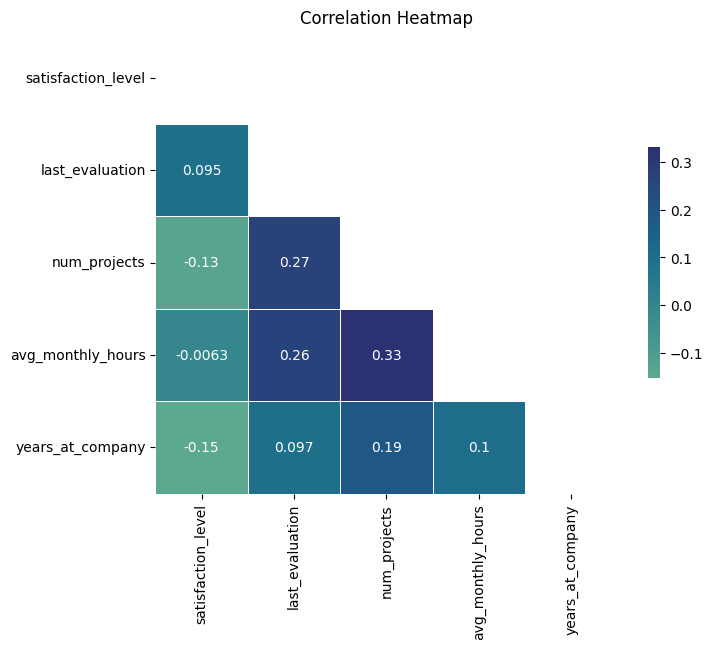

In [40]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))

corr = df_enc[['satisfaction_level', 'last_evaluation', 'num_projects', 'avg_monthly_hours', 'years_at_company']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, cmap="crest", mask=mask, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Heatmap')
plt.show()


Utilizing the departmental chart that we have previously established, we will conduct a comparative analysis between the individuals who have departed and those who have remained.

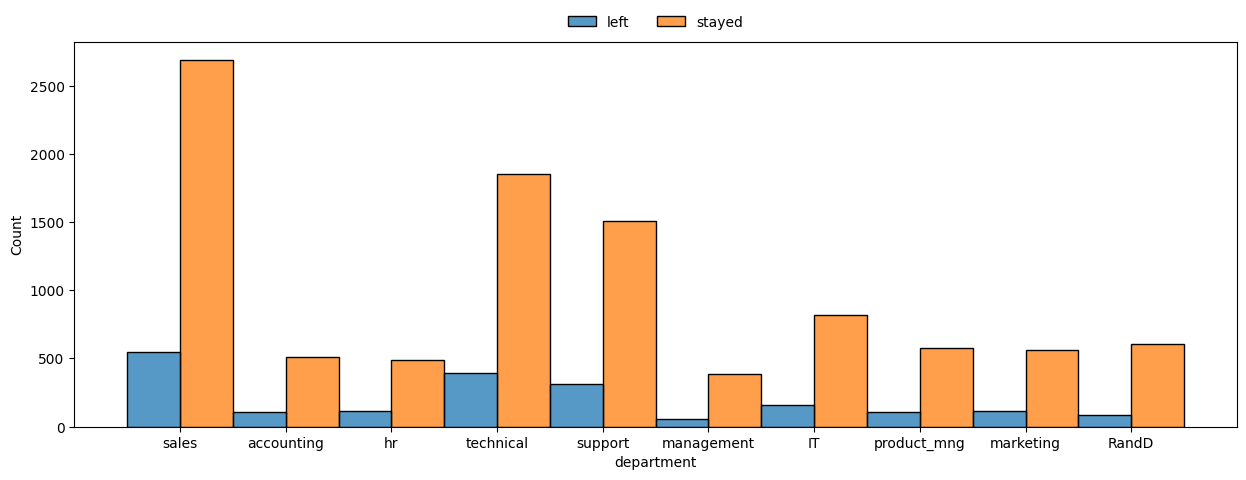

In [41]:
#departments chart in simple way
plt.figure(figsize=(15, 5))
ax1 = sns.histplot(df, x='department', hue='left_n', multiple="dodge")
sns.move_legend(ax1, "lower center",bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,)

Logistic regression is generally not robust to outliers. 

Outliers can have a significant impact on the model’s coefficients and predictions, leading to poor performance.

Therefore, it is recommended to remove any outliers from the dataset before fitting the model. 

One way to achieve this is by filtering out any data points that are considered outliers and saving the resulting dataset in a new DataFrame.

In [42]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df_out = df_enc[
    (df_enc['years_at_company'] >= lower_limit) & 
    (df_enc['years_at_company'] <= upper_limit)]

##### Boxplot
Check if we still have any outliers.

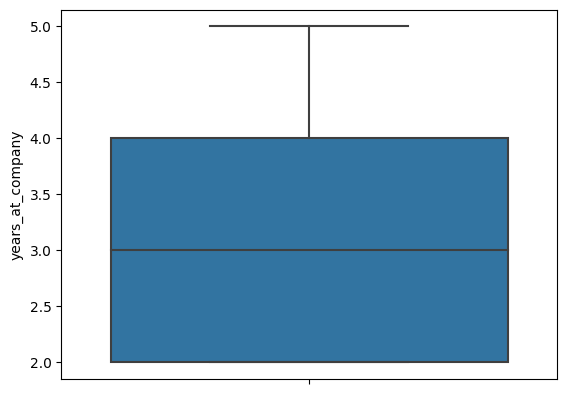

In [43]:
sns.boxplot(y=df_out['years_at_company'])
plt.show()

##### Isolate the target and predictor variables

In [44]:
# Isolate the target variable
y = df_out['left']
# isolate the predictor variables
X = df_out.copy()
X = X.drop('left', axis = 1)

In [45]:
y.value_counts(normalize=True)

left
False    0.831468
True     0.168532
Name: proportion, dtype: float64

##### Split the data

- Perform the train-test split. Due to the imbalanced target class (83% stayed vs. 17% left), it is crucial to ensure that the split does not disproportionately represent the frequency of the minority class.
- Set the function's `stratify` parameter to `y` to ensure that the minority class appears in both train and test sets in the same proportion that it does in the overall dataset

In [46]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [47]:
# Get shape of each training and testing set
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8375, 18), (2792, 18), (8375,), (2792,))

##### `Logistic Regression`

In [48]:
# Construct a logistic regression model and fit it to the training set
log_clf = LogisticRegression(random_state=42, max_iter=700).fit(X_train, y_train)

In [49]:
# get predictions on the test set
y_pred = log_clf.predict(X_test)

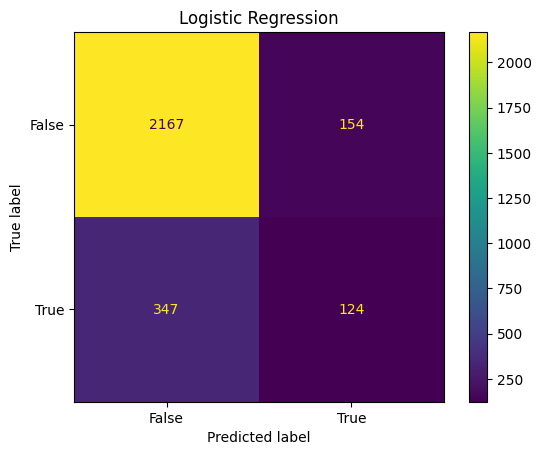

In [50]:
# Compute values for confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_clf.classes_)
disp.plot(values_format='')
plt.title('Logistic Regression')
plt.show()

`Notes`:

True negatives(The upper-left): The number of employees who did not leave that the model accurately classified as so.

False positives(The upper-right): The number of employees who did not leave the model misclassified as leaving.

False negatives(The bottom-left): The number of employees who left that the model misclassified as not leaveing.

True positives(The bottom-right): The number of employees who left the model accurately classified as so.

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

In [51]:
# Classification report
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.45      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



The results indicate that the model performs well in predicting employees who will stay. However, its effectiveness decreases when predicting employees who will leave. Given that our primary interest is in identifying employees who are likely to leave.

#### 2 Model: `Tree-based Model` (`Decision Tree`, `Random Forest` and `XGBoost`)


##### `Decision tree`
Baseline Model

In general, tree-based models are relatively robust to the presence of outliers in the data, both for training and prediction. 

it's important to note that the recall metric can make the decision tree model more vulnerable to overfitting.

The DataFrame without outliers (df_out) is not useful, so i will use the DataFrame df_enc instead.

In [52]:
# Isolate the target variable
y = df_enc['left']
# isolate the predictor variables
X = df_enc.copy()
X = X.drop('left', axis = 1)

In [53]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [54]:
# Instantiate the model
decision_tree = DecisionTreeClassifier(random_state=42)

In [55]:
# Fit the model to training data
decision_tree.fit(X_train, y_train)
# Make predictions on test data
dt_pred = decision_tree.predict(X_test)

In [56]:
# Generate performance metrics
print("Accuracy:", "%.3f" % accuracy_score(y_test, dt_pred))
print("Precision:", "%.3f" % precision_score(y_test, dt_pred))
print("Recall:", "%.3f" % recall_score(y_test, dt_pred))
print("F1 Score:", "%.3f" % f1_score(y_test, dt_pred))
print("Roc_auc Score:", "%.3f" % roc_auc_score(y_test, dt_pred))

Accuracy: 0.968
Precision: 0.893
Recall: 0.920
F1 Score: 0.906
Roc_auc Score: 0.949


Utilize cross-validated hyperparameter tuning to identify the optimal parameters for the model.

In [57]:
# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[2,4,6,8,10,None],
             'min_samples_leaf': [2,4,6,8,10],
             'min_samples_split': [5,10,15]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree_cv = GridSearchCV(decision_tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

`Note` : After finding the best parameters, I use them to make the model run faster when I want to use the model later.

In [58]:
%%time
tree_cv.fit(X_train, y_train)

CPU times: total: 8.58 s
Wall time: 10 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [2, 4, 6, 8, 10, None],
                         'min_samples_leaf': [2, 4, 6, 8, 10],
                         'min_samples_split': [5, 10, 15]},
             refit='roc_auc',
             scoring={'accuracy', 'f1', 'roc_auc', 'precision', 'recall'})

In [59]:
# Check best params
tree_cv.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 10}

In [60]:
# Check best AUC score on CV
tree_cv.best_score_

0.9764863170420495

It appears that the AUC (Area Under the Curve) is quite high, indicating a strong predictive capability of the model for identifying employees who are likely to leave.

- Extract all the validation scores from the grid search. 

In [61]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                        })
  
    return table

In [62]:
# Get all CV scores
tree1_cv_results = make_results('decision tree cv 1', tree_cv, 'auc')
tree1_cv_results

model  precision    recall        F1  accuracy       AUC
0  decision tree cv 1   0.966878  0.918288  0.941941  0.981208  0.976486

##### `Random forest` 
Tuning & Cross-Validation

In [63]:
# Create a Random Forest Classifier with a specified random state
rf = RandomForestClassifier(random_state=42)

# Define a dictionary of hyperparameters to search over using GridSearchCV
cv_params = {'max_depth': [5], 
             'max_features': [1.0],
             'max_samples': [0.7],
             'min_samples_leaf': [1],
             'min_samples_split': [4],
             'n_estimators': [500],
             }  

# Define a set of scoring metrics to capture during cross-validation
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearchCV with the Random Forest Classifier, hyperparameters, scoring, and cross-validation setup
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')


`Note` : After finding the best parameters, I use them to make the model run faster when I want to use the model later.

In [64]:
%%time
rf_cv.fit(X_train, y_train)

CPU times: total: 14.8 s
Wall time: 16.9 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5], 'max_features': [1.0],
                         'max_samples': [0.7], 'min_samples_leaf': [1],
                         'min_samples_split': [4], 'n_estimators': [500]},
             refit='roc_auc',
             scoring={'accuracy', 'f1', 'roc_auc', 'precision', 'recall'})

In [65]:
# Check best params
rf_cv.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

In [66]:
# Check best AUC score on CV
rf_cv.best_score_

0.981900767014093

In [67]:
# Get all CV scores
rf1_cv_results = make_results('random forest cv 1', rf_cv, 'auc')
rf1_cv_results

model  precision    recall        F1  accuracy       AUC
0  random forest cv 1    0.94688  0.918288  0.932326  0.977872  0.981901

Gets all the scores from a model's predictions.

In [68]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table


In [69]:
# Get predictions on test data
rf1_test_scores = get_scores('random forest test 1', rf_cv, X_test, y_test)
rf1_test_scores

model  precision    recall        F1  accuracy       AUC
0  random forest test 1   0.960334  0.923695  0.941658  0.980987  0.958047

- it appears that the test score is better than the validation score, except for the AUC.

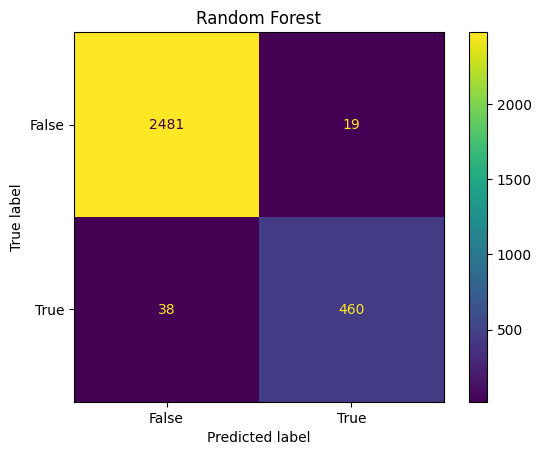

In [70]:
# confusion matrix
preds = rf_cv.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf_cv.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf_cv.classes_)
disp.plot(values_format='')
plt.title('Random Forest')
plt.show()

##### `XGBoost`

In [71]:
# Instantiate the model
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

# Assign a dictionary of hyperparameters to search over
cv_params = {'learning_rate': [0.03],
            'max_depth': [4],
            'min_child_weight': [2],
            'n_estimators': [322],
            'gamma': [0.16],
            'subsample': [0.5],
            'colsample_bytree': [1.0]
            }

#Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='roc_auc')

`Note` : After finding the best parameters, I use them to make the model run faster when I want to use the model later.

In [72]:
%%time
xgb_cv.fit(X_train, y_train)

CPU times: total: 8.22 s
Wall time: 1.65 s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'colsample_bytree': [1.0], 'gamma': [0.16],
                         'learning_rate': [0.03], 'max_depth': [4],
                         'min_child_weight': [2], 'n_estimators': [322],
                         'subsample': [0.5]},
             refit='roc_auc',
             scoring={'accuracy', 'f1', 'roc_auc', 'precision', 'recall'})

In [73]:
# Check best params
xgb_cv.best_params_

{'colsample_bytree': 1.0,
 'gamma': 0.16,
 'learning_rate': 0.03,
 'max_depth': 4,
 'min_child_weight': 2,
 'n_estimators': 322,
 'subsample': 0.5}

In [74]:
# Check best AUC score on CV
xgb_cv.best_score_

0.9861454765284129

In [75]:
# Get all CV validation scores
xgb1_cv_results = make_results('XGBoost cv 1', xgb_cv, 'auc')
xgb1_cv_results

model  precision    recall        F1  accuracy       AUC
0  XGBoost cv 1   0.963454  0.914265  0.938132  0.979984  0.986145

In [76]:
# Get predictions on test
xgb1_test_scores = get_scores('XGBoost test 1', xgb_cv, X_test, y_test)
xgb1_test_scores

model  precision    recall        F1  accuracy       AUC
0  XGBoost test 1   0.968553  0.927711  0.947692  0.982989  0.960855

#### Round 1 Validation and test results

##### `Validation`

In [77]:
# Concatenate all the validation scores dataframes.
round1_result = pd.concat([tree1_cv_results, rf1_cv_results ,xgb1_cv_results])
round1_result

model  precision    recall        F1  accuracy       AUC
0  decision tree cv 1   0.966878  0.918288  0.941941  0.981208  0.976486
0  random forest cv 1   0.946880  0.918288  0.932326  0.977872  0.981901
0        XGBoost cv 1   0.963454  0.914265  0.938132  0.979984  0.986145

Based on the validation scores, it is clear that the XGBoost model surpasses both the Decision Tree and Random Forest models in the majority of the metrics. The only exception is the recall metric, where the XGBoost model does not lead. 

##### `Test`

Gets all the scores from the predictions tests

In [78]:
# Concatenate all the test scores dataframes.
round1_test = pd.concat([rf1_test_scores ,xgb1_test_scores])
round1_test

model  precision    recall        F1  accuracy       AUC
0  random forest test 1   0.960334  0.923695  0.941658  0.980987  0.958047
0        XGBoost test 1   0.968553  0.927711  0.947692  0.982989  0.960855

In the evaluation of test scores, the XGBoost model outperforms the Random Forest model across all metrics.

so in this particular dataset, the XGBoost model appears to be a strong model and is a more suitable choice compared to the Decision Tree and Random Forest models.

#### The champion model `Confusion Matrix` and `Feature Importances`

##### Confusion Matrix

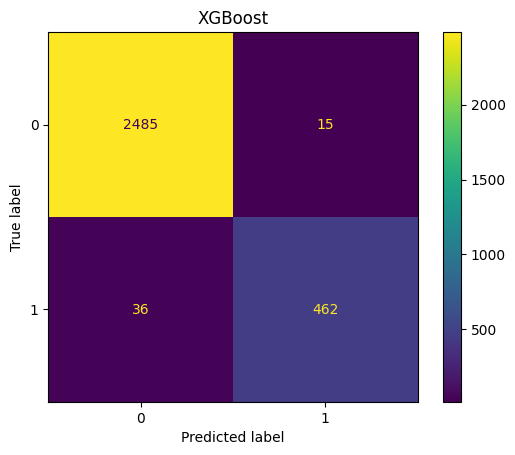

In [79]:
# confusion matrix
preds = xgb_cv.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=xgb_cv.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=xgb_cv.classes_)
disp.plot(values_format='')
plt.title('XGBoost')
plt.show()

##### Feature importance

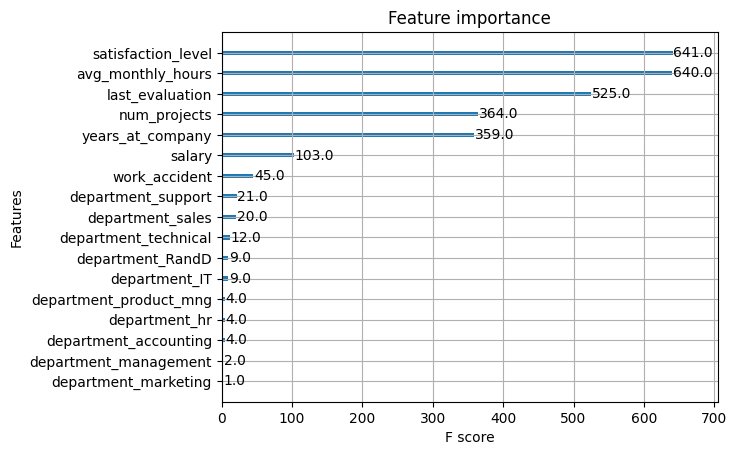

In [80]:
plot_importance(xgb_cv.best_estimator_);

Based on the provided information, it appears that the model is performing well. However, upon further investigation("i check the correction of this capstone"), there is a chance that there is some data leakage occurring.


`From the capstone` :

Data leakage is when you use data to train your model that should not be used during training either because it appears in the test data or because it’s not data that you would expect to have when the model is actually deployed. Training a model with leakage data can give an unrealistic score that is not replicated in production 1.

In this case, it’s likely that the company won’t have satisfaction levels reported for all of its employees. It’s also possible that the average_monthly_hours column is a source of some data leakage. If employees have already decided upon quitting, or have already been identified by management as people to be fired, they may be working fewer hours.

To address this issue, i could proceed by dropping `satisfaction_level` and creating a new feature that roughly captures whether an employee is overworked. this new feature will be called `overworked`. It will be a binary variable 1.

### Round 2

#### Feature Engineering
New feature `overworked`

Drop  `satisfaction_level` and `avg_monthly_hours`

In [81]:
## create a copy of the df_enc for this 2 round
df_noleak = df_enc.copy()

# Create a new binary column 'overworked' where 1 indicates overwork.
# If 167 is the average monthly hours, we can consider 180 as overwork (9 hours days)
df_noleak['overworked'] = np.where(df_noleak['avg_monthly_hours']>= 180,1,0)

#We drop 'satisfaction_level' and 'avg_monthly_hours' based on the specific requirements of our analysis
df_noleak = df_noleak.drop(['satisfaction_level', 'avg_monthly_hours'], axis=1)

#print the new df
df_noleak.head(2)

last_evaluation  num_projects  years_at_company  work_accident  left  \
0             0.53             2                 3              0  True   
1             0.86             5                 6              0  True   

   promotion_last_5years  salary  department_IT  department_RandD  \
0                      0       0          False             False   
1                      0       1          False             False   

   department_accounting  department_hr  department_management  \
0                  False          False                  False   
1                  False          False                  False   

   department_marketing  department_product_mng  department_sales  \
0                 False                   False              True   
1                 False                   False              True   

   department_support  department_technical  overworked  
0               False                 False           0  
1               False                 False           1

In [82]:
# Isolate the target variable
y = df_noleak['left']

# isolate the predictor variables
X = df_noleak.copy()
X = X.drop('left', axis = 1)

In [83]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [84]:
# Get shape of each training and testing set
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8993, 17), (2998, 17), (8993,), (2998,))

##### `Decision tree`

In [85]:
# Instantiate the model
decision_tree = DecisionTreeClassifier(random_state=42)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[5],
             'min_samples_leaf': [1],
             'min_samples_split': [4]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree_cv_noleak = GridSearchCV(decision_tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

`Note` : After finding the best parameters, I use them to make the model run faster when I want to use the model later.

In [86]:
%%time
tree_cv_noleak.fit(X_train, y_train)

CPU times: total: 78.1 ms
Wall time: 128 ms


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [5], 'min_samples_leaf': [1],
                         'min_samples_split': [4]},
             refit='roc_auc',
             scoring={'accuracy', 'f1', 'roc_auc', 'precision', 'recall'})

In [87]:
# Check best params
tree_cv_noleak.best_params_

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 4}

In [88]:
# Check best AUC score on CV
tree_cv_noleak.best_score_

0.9582582080065758

In [89]:
# Get all CV scores
tree_noleak_results = make_results('decision tree cv 2', tree_cv_noleak, 'auc')

# Concatenate the dataframes of the decision tree in round 1 and round 2.
decision_tree = pd.concat([tree1_cv_results ,tree_noleak_results])
decision_tree

model  precision    recall        F1  accuracy       AUC
0  decision tree cv 1   0.966878  0.918288  0.941941  0.981208  0.976486
0  decision tree cv 2   0.840833  0.859330  0.849440  0.949627  0.958258

The decision tree model performed well with high precision, recall, F1 score, accuracy, and AUC values. Although some scores were lower due to the reduced set of features used in this round of the model, overall the results are very good.

Plot the Decision tree

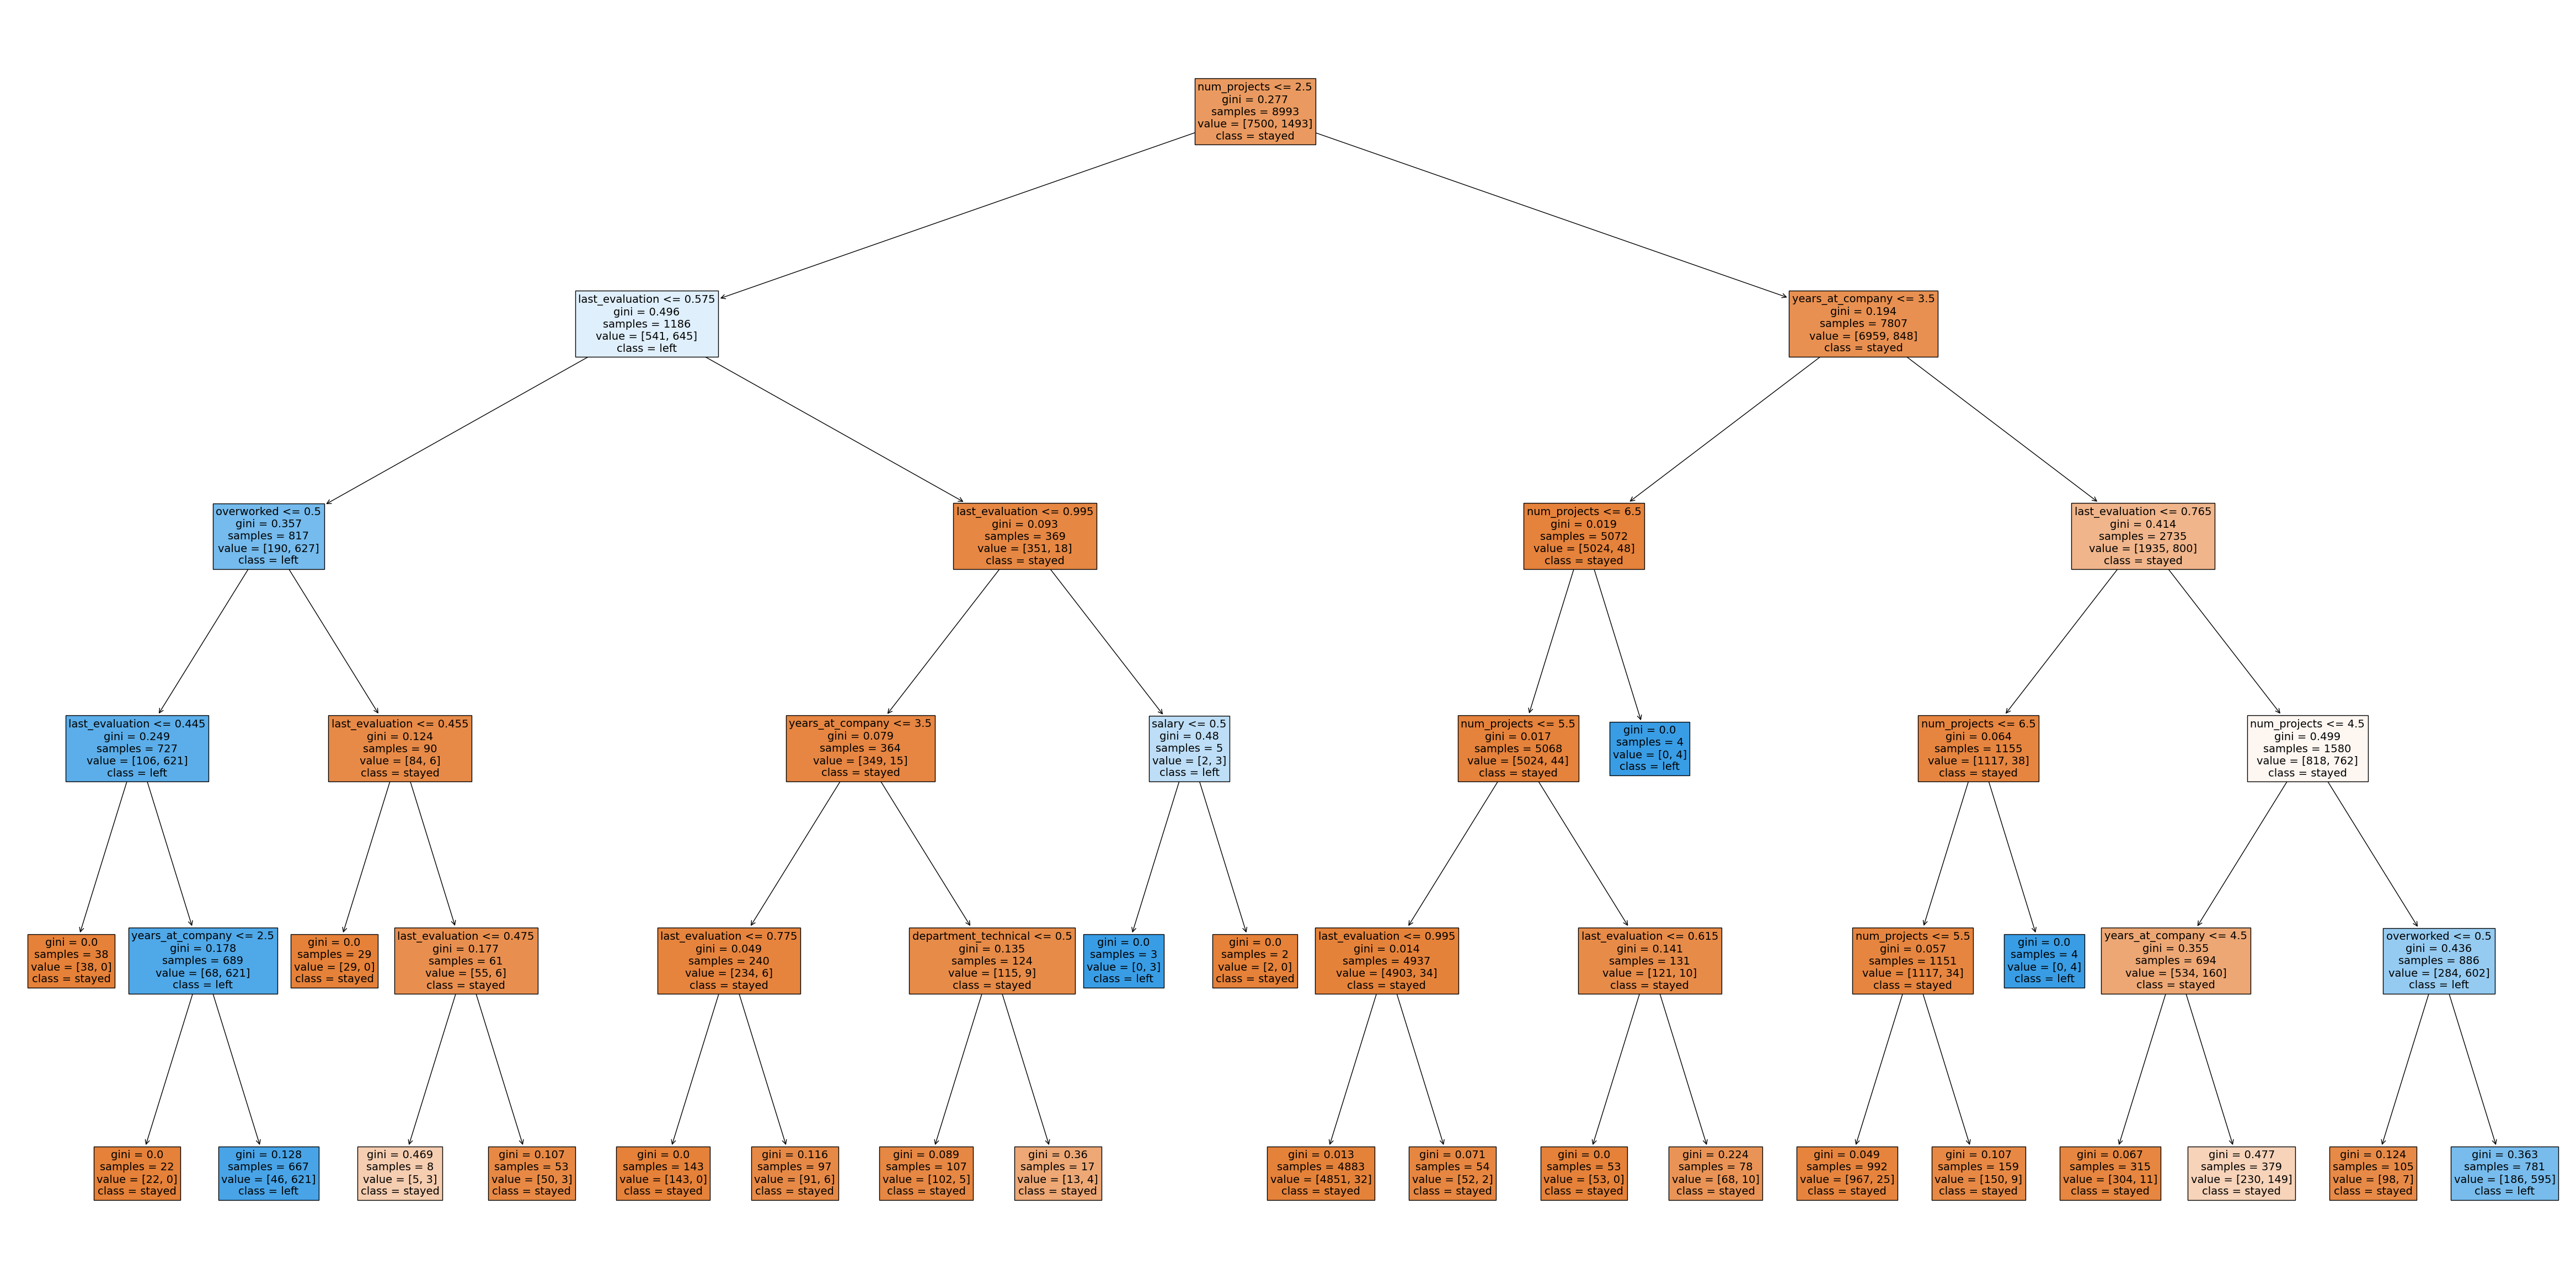

In [90]:
# Plot the tree
plt.figure(figsize=(60,30))
plot_tree(tree_cv_noleak.best_estimator_,
          max_depth=5, fontsize=14, feature_names=X.columns, 
          class_names={ 1:'left',0: 'stayed'}, filled=True);
plt.show()

##### `Random forest`

In [91]:
# Create a Random Forest Classifier with a specified random state
rf = RandomForestClassifier(random_state=42)

# Define a dictionary of hyperparameters to search over using GridSearchCV
cv_params = {'max_depth': [5], 
             'max_features': [1.0],
             'max_samples': [0.7],
             'min_samples_leaf': [2],
             'min_samples_split': [2],
             'n_estimators': [300],
             }  

# Define a set of scoring metrics to capture during cross-validation
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearchCV with the Random Forest Classifier, hyperparameters, scoring, and cross-validation setup
rf_cv_noleak = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')


`Note` : After finding the best parameters, I use them to make the model run faster when I want to use the model later.

In [92]:
%%time
rf_cv_noleak.fit(X_train, y_train)

CPU times: total: 7.08 s
Wall time: 7.74 s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5], 'max_features': [1.0],
                         'max_samples': [0.7], 'min_samples_leaf': [2],
                         'min_samples_split': [2], 'n_estimators': [300]},
             refit='roc_auc',
             scoring={'accuracy', 'f1', 'roc_auc', 'precision', 'recall'})

In [93]:
# Check best parameters 
rf_cv_noleak.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [94]:
# Check best AUC score on CV
rf_cv_noleak.best_score_

0.9666356143042155

In [95]:
# Get all CV scores
rf_cv_noleak_results = make_results('random forest cv 2', rf_cv_noleak, 'auc')

# Concatenate the dataframes of the random forest in round 1 and round 2.
random_forest = pd.concat([rf1_cv_results ,rf_cv_noleak_results])
random_forest

model  precision    recall        F1  accuracy       AUC
0  random forest cv 1   0.946880  0.918288  0.932326  0.977872  0.981901
0  random forest cv 2   0.847077  0.900869  0.873128  0.956522  0.966636

Similar to the decision tree model, the random forest model also performed well, achieving high precision, recall, F1 score, accuracy, and AUC values. Although some scores were lower due to the reduced set of features used in this round of the model, the overall results are very good.

##### `XGBoost`

In [96]:
# Instantiate the model
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

# Assign a dictionary of hyperparameters to search over
cv_params = {'learning_rate': [0.067],
            'max_depth': [5],
            'min_child_weight': [3],
            'n_estimators': [93],
            'gamma': [0.13],
            'subsample': [0.94],
            'colsample_bytree': [0.97]
            }

#Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
xgb_cv_noleak = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [97]:
%%time
xgb_cv_noleak.fit(X_train, y_train)

CPU times: total: 3.09 s
Wall time: 693 ms


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'colsample_bytree': [0.97], 'gamma': [0.13],
                         'learning_rate': [0.067], 'max_depth': [5],
                         'min_child_weight': [3], 'n_estimators': [93],
                         'subsample': [0.94]},
             refit='roc_auc',
             scoring={'accuracy', 'f1', 'roc_auc', 'precision', 'recall'})

In [98]:
# Check best AUC score on CV
xgb_cv_noleak.best_score_

0.9749996678661715

In [99]:
# Get all CV scores
xgb_noleak_results = make_results('XGBoost cv 2', xgb_cv_noleak, 'auc')

# Concatenate the dataframes of the XGBoost in round 1 and round 2.
xgboost = pd.concat([xgb1_cv_results ,xgb_noleak_results])
xgboost

model  precision    recall        F1  accuracy       AUC
0  XGBoost cv 1   0.963454  0.914265  0.938132  0.979984  0.986145
0  XGBoost cv 2   0.909136  0.887477  0.897984  0.966529  0.975000

It appears that the performance of the `Decision Tree`, `Random Forest`, and `XGBoost` models decreased in the second round, likely due to the reduction in the number of features utilized.

#### Round 2 Validation and Test results

##### `Validation`

In [100]:
# Concatenate all the validation scores dataframes.
round2_result = pd.concat([tree_noleak_results, rf_cv_noleak_results ,xgb_noleak_results])
round2_result

model  precision    recall        F1  accuracy       AUC
0  decision tree cv 2   0.840833  0.859330  0.849440  0.949627  0.958258
0  random forest cv 2   0.847077  0.900869  0.873128  0.956522  0.966636
0        XGBoost cv 2   0.909136  0.887477  0.897984  0.966529  0.975000

The `XGBoost` model outperformed the `Decision Tree` and `Random Forest` models on all metrics except recall. Although the `random forest` model had a higher recall score, the `XGBoost` model is still the best model overall, given its superior performance on precision, F1 score, accuracy, and AUC.

##### `Test`

In [101]:
# Get predictions on test data
tree2_test_scores = get_scores('decision tree test 2', tree_cv_noleak, X_test, y_test)
rf2_test_scores = get_scores('random forest test 2', rf_cv_noleak, X_test, y_test)
xgb2_test_scores = get_scores('xgboost test 2', xgb_cv_noleak, X_test, y_test)


# Concatenate all the test scores dataframes.
round2_test = pd.concat([tree2_test_scores, rf2_test_scores, xgb2_test_scores])
round2_test

model  precision    recall        F1  accuracy       AUC
0  decision tree test 2   0.833333  0.823293  0.828283  0.943296  0.895247
0  random forest test 2   0.870229  0.915663  0.892368  0.963309  0.944231
0        xgboost test 2   0.911290  0.907631  0.909457  0.969980  0.945015

Based on the results, it appears that the `XGBoost` model consistently outperforms both the `Decision Tree` and `Random Forest` models (except recall in the random forest), even in the testing phase. This suggests that the `XGBoost` model is not only effective but also stable, making it a robust and high-performing final model.

#### The champion model `Confusion Matrix` and `Feature Importances`

##### Confusion Matrix

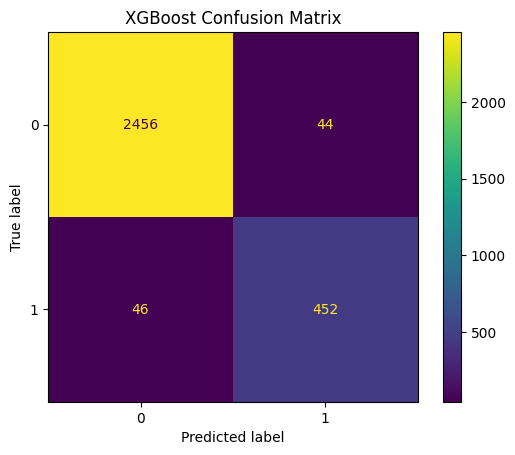

In [110]:
# confusion matrix
preds = xgb_cv_noleak.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=xgb_cv_noleak.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=xgb_cv_noleak.classes_)
disp.plot(values_format='')
plt.title("XGBoost Confusion Matrix")
plt.show()

- True Negatives (Predicted: False, Actual: False): 2456. This indicates that the model accurately predicted 2432 instances where employees were forecasted to stay and did indeed stay.

- False Positives (Predicted: True, Actual: False): 44. This represents the instances where the model predicted that employees would leave, but they actually stayed.

- False Negatives (Predicted: False, Actual: True): 46. This signifies the cases where the model predicted that employees would stay, but they actually left.

- True Positives (Predicted: True, Actual: True): 452. This shows that the model correctly predicted 456 cases where employees were forecasted to leave and did indeed leave.

the model tends to predict a higher number of false positives, This implies that there is a propensity for the model to categorize certain employees as likely to depart from the company, when in actuality, they remain. Despite this tendency, it is important to underscore that the overall robustness of the model remains intact and it continues to serve as a valuable tool.

##### Feature importance

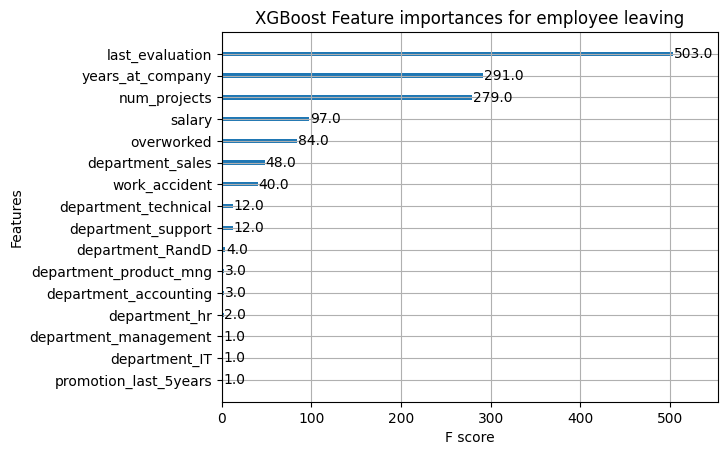

In [106]:
plot_importance(xgb_cv_noleak.best_estimator_)
plt.title('XGBoost Feature importances for employee leaving')
plt.show()

The feature importance chart highlights the significance of different variables in our predictive model. The top five influential factors, in order, are `last_evaluation`, `year_at_company`, `number_project`, `salary`, and `overworked`. These variables play a crucial role in predicting the left variable.

Their importance is measured using the F score, a metric that quantifies their impact.

On the other hand, department_management, department_IT and promotion_last_5years, have the least influence on the target outcome. 

This helps us better understand the model's decision-making process and the key factors driving our predictions.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

1) What key insights emerged from your model(s)?
2) What business recommendations do you propose based on the models built?
3) What potential recommendations would you make to your manager/company?
4) Do you think your model could be improved? Why or why not? How?
5) What resources do you find yourself using as you complete this stage? (Make sure to include the links.)

1) From the champion XGBoost model we used, we concluded that employees at the company are overworked. The model identified the top five influential factors contributing to this situation as: last evaluation scores, tenure (years at company), number of projects, salary, and overwork. These factors have the most significant impact on employee workload, and addressing these areas could help alleviate the issue of overwork.
2) Review Influential Factors: The models highlighted last evaluation scores, tenure, number of projects, salary, and overwork as the top five influential factors. These areas could be targeted for improvement. For example, ensure fair and regular evaluations, provide competitive salaries, and balance the number of projects assigned to each employee
3) Career Development: Provide opportunities for employees to grow and develop in their roles. This could include training programs, mentorship, and opportunities for advancement2
4) Yes, More Data: Gathering more data can help improve the model’s performance.Feature Engineering Creating new features or transforming existing ones
5) all the link i used :  [Python docs](https://docs.python.org/3.11/), [Seaborn chart](https://seaborn.pydata.org/examples/index.html), [Plotly](https://plotly.com/python/), [Matplotlib](https://matplotlib.org/stable/plot_types/index.html), [Stackoverflow](https://stackoverflow.com/), [Scikit-Learn](https://scikit-learn.org/stable/index.html), [XGBoost](https://xgboost.readthedocs.io/en/latest/python/python_api.html)

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results
- 1 model:

`logistic regression`

This model achieved a precision of 79%, recall of 82%, F1 score of 80%, and accuracy of 82%. It predicts well which employees will stay, but its effectiveness decreases when predicting employees who will leave. Since our primary interest is in identifying employees who are likely to leave, this is a significant limitation of the model.



- 2 model: Tree-based Model: Test score

`Decision Tree`
This model achieved a precision of 83%, recall of 82%, F1 score of 82%, accuracy of 94% and AUC of 89.5%. 


`Random Forest`
This model achieved a precision of 87%, recall of 91.5%, F1 score of 89%, accuracy of 96%, and AUC of 94.4%. 

The model is better in all the metrics than the decision tree.


`XGBoost`
This model achieved a precision of 91%, recall of 90.7%, F1 score of 91%, accuracy of 97% and AUC of 94.5%.

The model outperforms both the `Decision Tree` and `Random Forest` models (except recall in the random forest), making it the champion model.

### Conclusion, Recommendations.

It has come to our attention that a variety of factors are contributing to the company’s attrition rate. Our analysis, based on machine learning model and feature importance extracted from the champion model, confirms that employees within the company are experiencing high levels of workload.

In order to reduce the attrition rate and retain our valuable employees, we propose the following recommendations to the stakeholders:

- Compensate Overworked Employees: Implement a reward system for employees who work long hours. This could be in the form of financial compensation or by ensuring they are not required to consistently work beyond their contracted hours.

- Recognize Employee Efforts: Acknowledge and reward employees for their hard work and dedication. This could be through public recognition, bonuses, or other incentives. Regular performance reviews can also help employees understand their strengths and areas for improvement.

- Balance Promotion Rates: Ensure fair and transparent promotion policies across all departments. If certain departments have lower promotion rates, investigate the reasons and take corrective action. This will prevent employees from feeling undervalued or abandoned.

- Establish Clear Promotion Criteria: Create clear and transparent promotion criteria to ensure that employees understand the expectations for advancement.

- Promote Long-Tenured Employees: Consider promoting employees who have been with the company for at least four years. Alternatively, conduct further investigation into why employees with four years of tenure are dissatisfied.

- Limit Project Load: Cap the number of projects that employees can work on. The optimal number is 3 to 4.

- Prioritize Tasks and Set Realistic Deadlines: Ensure that employees are not overburdened with unrealistic expectations.

- Enhance Recognition and Evaluation: Implement a system that recognizes and rewards employee contributions. This could include regular feedback and performance evaluations, highlighting their achievements, and offering constructive criticism when necessary.

- Conduct Exit Interviews: Gather feedback from departing employees to gain insights into the reasons for their departure. This feedback can be used to identify areas for improvement and address common issues that contribute to attrition.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.